In [1]:
#%% Import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
from nets_predict.classes.hmm import HiddenMarkovModelClass
from nets_predict.classes.partial_correlation import PartialCorrelationClass
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

HMMClass = HiddenMarkovModelClass()
PartialCorrClass = PartialCorrelationClass()


/users/win-fmrib-analysis/psz102/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# set parameters for script
n_chunk = 4
n_ICs = 25
n_edge = int((n_ICs * (n_ICs - 1))/2)
n_states = 8

In [4]:
# set project directories
proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/nets-predict/nets_predict'
load_dir = f"{proj_dir}/results/ICA_{n_ICs}/edge_prediction/{n_chunk}_chunks/combined"

# decide which featured to examine
feature_prediction_dict = dict()
feature_prediction_dict['actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual_with_r2.npz")
feature_prediction_dict['weighted_covs_actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_covs_states_{n_states}_model_mean_True_actual_with_r2.npz")
feature_prediction_dict['weighted_icovs_actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_icovs_states_{n_states}_model_mean_True_actual_with_r2.npz")
feature_prediction_dict['static'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True_with_r2.npz")
feature_prediction_dict['fc'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_fc_states_{n_states}_model_mean_True_with_r2.npz")
feature_prediction_dict['pc'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_pc_states_{n_states}_model_mean_True_with_r2.npz")
#feature_prediction_dict['all'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_all_states_{n_states}_model_mean_True_with_r2.npz")
feature_prediction_dict['means'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_means_states_{n_states}_model_mean_True_with_r2.npz")
feature_prediction_dict['tpms_ss'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_states_{n_states}_model_mean_True_with_r2.npz")
feature_prediction_dict['tpms_ss_only'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_only_states_{n_states}_model_mean_True_with_r2.npz")
#feature_prediction_dict['weighted_covs'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_covs_states_{n_states}_model_mean_True_with_r2.npz")
#feature_prediction_dict['iweighted_covs'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_icovs_states_{n_states}_model_mean_True_with_r2.npz")
feature_prediction_dict['static_pca'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_pca_states_0_model_mean_True_with_r2.npz")
feature_prediction_dict['static_connecting_edges'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_connecting_edges_states_0_model_mean_True_with_r2.npz")


In [5]:
print(*feature_prediction_dict['actual'])
print(*feature_prediction_dict['static'])

print(feature_prediction_dict['actual']['netmats_flatten'].shape)

accuracy_per_edge partial_correlations_chunk netmats_flatten ground_truth_matrix_partial_flatten r2_accuracy_per_edge
alpha l1_ratio corr_y predict_y beta accuracy_per_edge r2_accuracy_per_edge
(4, 1003, 300)


In [119]:
# print(np.mean(feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge]))
# print(np.mean(ground_truth_matrix_partial_flatten[:,edge]))
# np.mean(ground_truth_matrix_partial_flatten[:,edge] - np.mean(ground_truth_matrix_partial_flatten[:,edge]))
# np.mean(feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge] - np.mean(feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge]))

In [120]:
# from scipy.stats import pearsonr
# from sklearn.metrics import r2_score

# static_dir = f"{proj_dir}/results/ICA_{n_ICs}/static"
# partial_correlations_chunk = np.load(f"{static_dir}/partial_correlations_{n_chunk}_chunks.npy")
# print(partial_correlations_chunk.shape)
# partial_correlations_chunk_flatten = PartialCorrClass.extract_upper_off_main_diag(partial_correlations_chunk)
# print(partial_correlations_chunk_flatten.shape)

# print(*feature_prediction_dict['actual'])


# accuracy_per_edge_nm_icov_pm_icov = np.zeros((n_chunk, n_edge))
# accuracy_per_edge_nm_icov_pm_icov_version2 = np.zeros((n_chunk, n_edge))
# accuracy_per_edge_nm_icov_pm_icov_pred = np.zeros((n_chunk, n_edge))
# r2_per_edge_nm_icov_pm_icov = np.zeros((n_chunk, n_edge))
# r2_per_edge_nm_icov_pm_icov_version2 = np.zeros((n_chunk, n_edge))
# r2_per_edge_nm_icov_pm_icov_mean_adjust = np.zeros((n_chunk, n_edge))
# r2_per_edge_nm_icov_pm_icov_version2_pred = np.zeros((n_chunk, n_edge))
# r2_per_edge_nm_icov_pm_icov_mean_adjust_pred = np.zeros((n_chunk, n_edge))

# ground_truth_matrix_partial_flatten = feature_prediction_dict['actual']['ground_truth_matrix_partial_flatten']
# netmats_flatten = feature_prediction_dict['actual']['netmats_flatten']

# for edge in range(n_edge):
#     print(edge)
#     for chunk in range(n_chunk):
#         accuracy_per_edge_nm_icov_pm_icov[chunk,edge] = pearsonr(partial_correlations_chunk_flatten[:,chunk,edge], ground_truth_matrix_partial_flatten[:,edge])[0]
#         accuracy_per_edge_nm_icov_pm_icov_version2[chunk,edge] = pearsonr(feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge], ground_truth_matrix_partial_flatten[:,edge])[0]
#         accuracy_per_edge_nm_icov_pm_icov_pred[chunk,edge] = pearsonr(feature_prediction_dict['static']['predict_y'][chunk,:,edge], ground_truth_matrix_partial_flatten[:,edge])[0]
#         r2_per_edge_nm_icov_pm_icov[chunk,edge] = r2_score(ground_truth_matrix_partial_flatten[:,edge], partial_correlations_chunk_flatten[:,chunk,edge])
#         r2_per_edge_nm_icov_pm_icov_version2[chunk,edge] = r2_score(ground_truth_matrix_partial_flatten[:,edge], feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge])
#         r2_per_edge_nm_icov_pm_icov_mean_adjust[chunk,edge] = r2_score((ground_truth_matrix_partial_flatten[:,edge] - np.mean(ground_truth_matrix_partial_flatten[:,edge])), (feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge] - np.mean(feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge])))
#         r2_per_edge_nm_icov_pm_icov_version2_pred[chunk,edge] = r2_score(ground_truth_matrix_partial_flatten[:,edge], feature_prediction_dict['static']['predict_y'][chunk,:,edge])
#         r2_per_edge_nm_icov_pm_icov_mean_adjust_pred[chunk,edge] = r2_score((ground_truth_matrix_partial_flatten[:,edge] - np.mean(ground_truth_matrix_partial_flatten[:,edge])), (feature_prediction_dict['static']['predict_y'][chunk,:,edge] - np.mean(feature_prediction_dict['static']['predict_y'][chunk,:,edge])))
        
# print(np.mean(r2_per_edge_nm_icov_pm_icov))
# print(np.mean(r2_per_edge_nm_icov_pm_icov_version2))

# print(partial_correlations_chunk_flatten.shape)
# #print(ground_truth_icov_reshape.shape)
# print(ground_truth_matrix_partial_flatten.shape)

(1003, 4, 25, 25)
(1003, 4, 300)
accuracy_per_edge partial_correlations_chunk netmats_flatten ground_truth_matrix_partial_flatten r2_accuracy_per_edge
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239

In [121]:
# print(np.mean(accuracy_per_edge_nm_icov_pm_icov))
# print(np.mean(accuracy_per_edge_nm_icov_pm_icov_version2))
# print(np.mean(accuracy_per_edge_nm_icov_pm_icov_pred))
# print(f"Actual: {np.mean(r2_per_edge_nm_icov_pm_icov)}")
# print(f"Actual: {np.mean(r2_per_edge_nm_icov_pm_icov_version2)}")
# print(f"Actual (Mean adjust): {np.mean(r2_per_edge_nm_icov_pm_icov_mean_adjust)}")
# print(f"Predict: {np.mean(r2_per_edge_nm_icov_pm_icov_version2_pred)}")
# print(f"Predict (mean adjust): {np.mean(r2_per_edge_nm_icov_pm_icov_mean_adjust_pred)}")

0.6919463056538477
0.6919463056538477
0.7007705039402872
Actual: -0.13298486771787546
Actual: -0.13298486771787546
Actual (Mean adjust): -0.1160031711604226
Predict: 0.4888788082418919
Predict (mean adjust): 0.48888161135967273


In [9]:
# load ground truth matrix
ground_truth_dir = f"{proj_dir}/results/ICA_{n_ICs}/ground_truth"
ground_truth_matrix = np.load(f"{ground_truth_dir}/ground_truth_partial_mean_4_sessions.npy")

# extract upper diagonal (excluding main diagonal) 
ground_truth_icov_reshape = PartialCorrClass.extract_upper_off_main_diag(ground_truth_matrix)

# take mean ground truth across subjects
ground_truth_icov_reshape_mean = np.mean(ground_truth_icov_reshape,axis=0)


In [10]:
# 

In [11]:
################## WE NOW INTRODUCE DYNAMICS ##################

# note how many dynamic features are being used and print what they are
n_feat_type = len(feature_prediction_dict) 
print(n_feat_type)
print(*feature_prediction_dict)

11
actual weighted_covs_actual weighted_icovs_actual static fc pc means tpms_ss tpms_ss_only static_pca static_connecting_edges


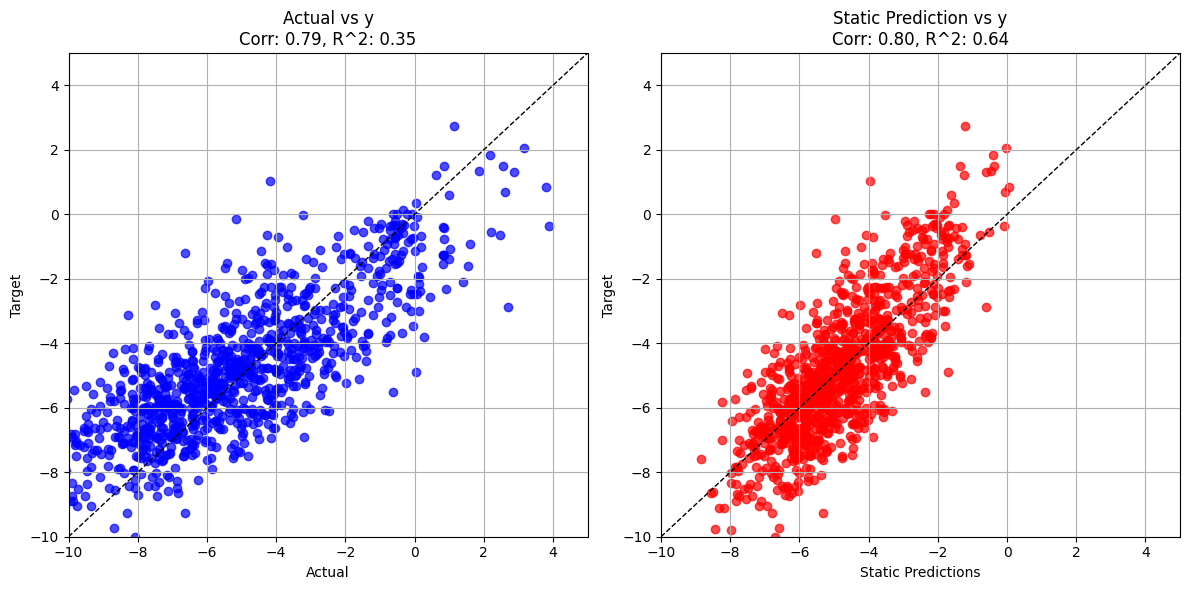

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming feature_prediction_dict and ground_truth_icov_reshape are already defined
a = feature_prediction_dict['actual']['netmats_flatten']
b = feature_prediction_dict['static']['predict_y']

# Define your data
chunk = 3
edge = 1
actual = a[chunk, :, edge]
static = b[chunk, :, edge]
y = ground_truth_icov_reshape[:, edge]

# Calculate correlation coefficients
corr_actual_y = np.corrcoef(actual, y)[0, 1]
corr_static_y = np.corrcoef(static, y)[0, 1]

# Calculate R^2 scores
r2_actual_y = r2_score(y, actual)
r2_static_y = r2_score(y, static)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for actual vs y
ax1.scatter(actual, y, color='blue', alpha=0.7)
ax1.set_title(f'Actual vs y\nCorr: {corr_actual_y:.2f}, R^2: {r2_actual_y:.2f}')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Target')
ax1.set_xlim(-10, 5)  # Set x-axis limits
ax1.set_ylim(-10, 5)  # Set x-axis limits
ax1.grid(True)
ax1.plot([-10, 5], [-10, 5], 'k--', linewidth=1)  # Add y=x line

# Scatter plot for static vs y
ax2.scatter(static, y, color='red', alpha=0.7)
ax2.set_title(f'Static Prediction vs y\nCorr: {corr_static_y:.2f}, R^2: {r2_static_y:.2f}')
ax2.set_xlabel('Static Predictions')
ax2.set_ylabel('Target')
ax2.set_xlim(-10, 5)  # Set x-axis limits
ax2.set_ylim(-10, 5)  # Set x-axis limits
ax2.grid(True)
ax2.plot([-10, 5], [-10, 5], 'k--', linewidth=1)  # Add y=x line

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


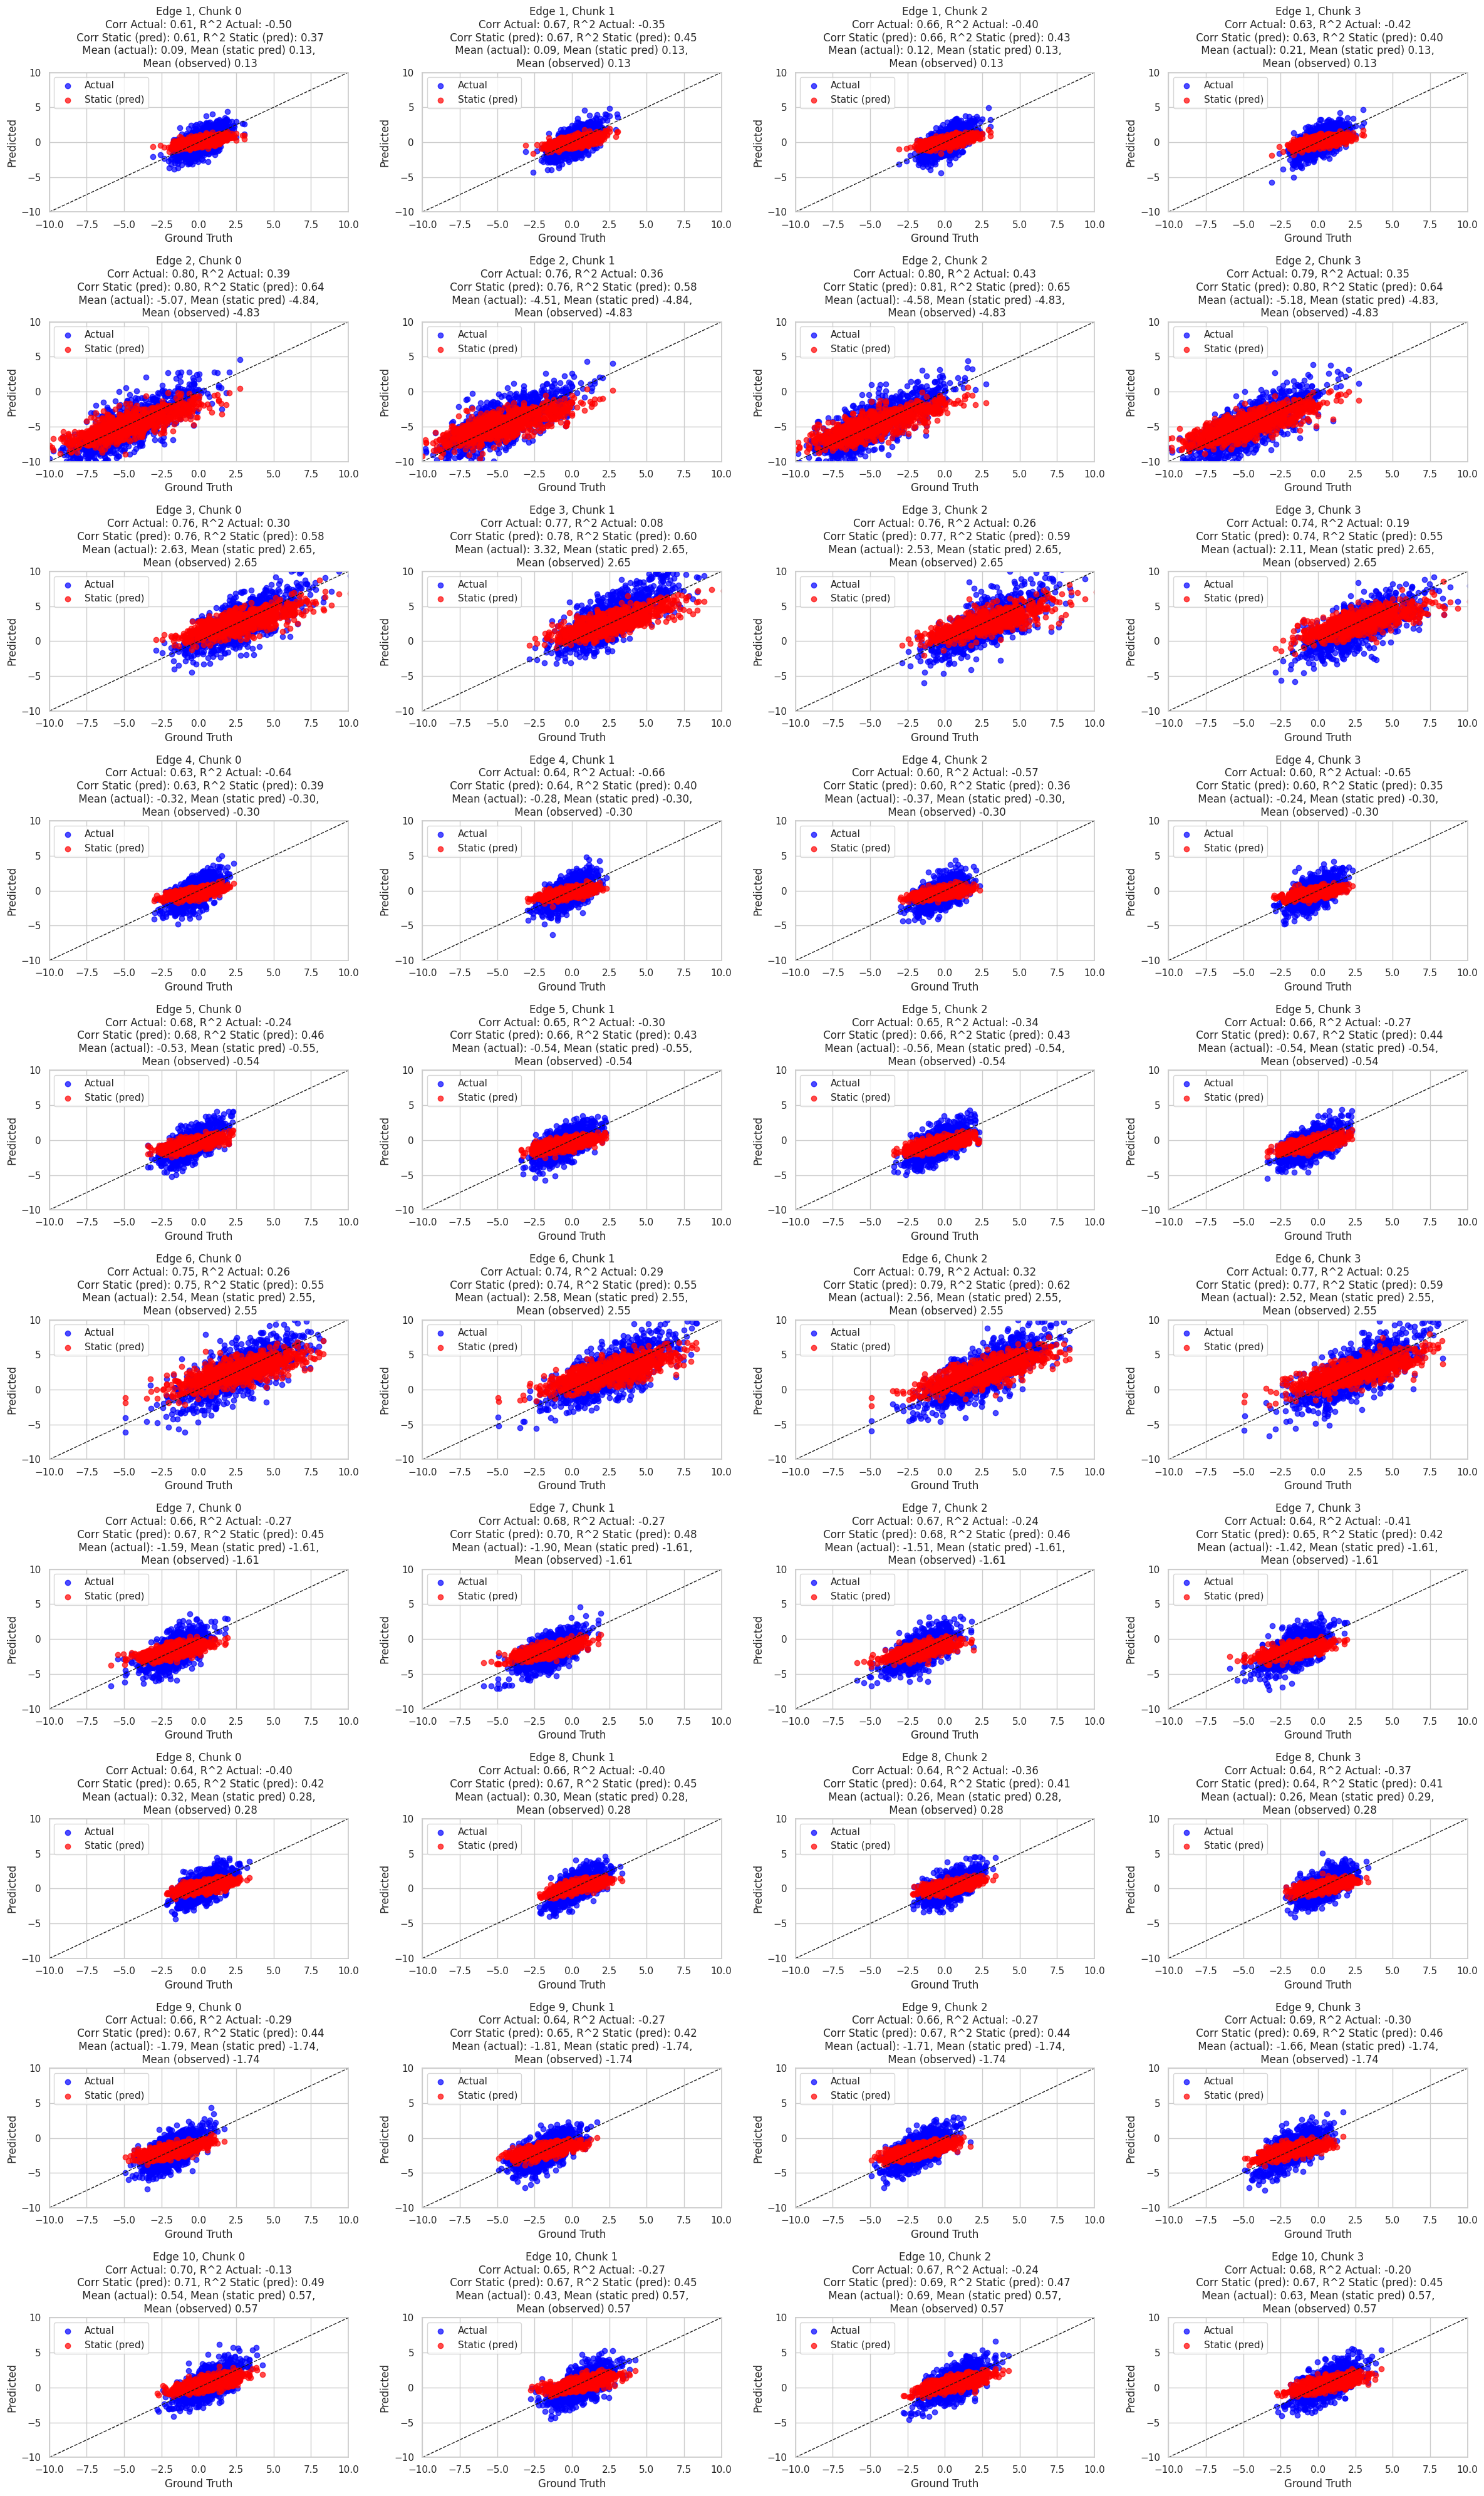

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming feature_prediction_dict and ground_truth_icov_reshape are already defined
a = feature_prediction_dict['actual']['netmats_flatten']
b = feature_prediction_dict['static']['predict_y']

# Define the number of chunks
n_chunks = 4
n_edges = 10  # Number of edges

# Create subplots
fig, axes = plt.subplots(n_edges, n_chunks, figsize=(24, 40))

# Loop through each edge
for edge in range(n_edges):
    for chunk in range(n_chunks):
        # Define your data
        actual = a[chunk, :, edge]
        static = b[chunk, :, edge]
        y = ground_truth_icov_reshape[:, edge]

        # Calculate correlation coefficients
        corr_actual_y = np.corrcoef(y, actual)[0, 1]
        corr_static_y = np.corrcoef(y, static)[0, 1]

        # Calculate R^2 scores
        r2_actual_y = r2_score(y, actual)
        r2_static_y = r2_score(y, static)

        # Scatter plot for ground truth vs actual
        axes[edge, chunk].scatter(y, actual, color='blue', alpha=0.7, label='Actual')
        axes[edge, chunk].scatter(y, static, color='red', alpha=0.7, label='Static (pred)')
        axes[edge, chunk].set_title(f'Edge {edge+1}, Chunk {chunk}\nCorr Actual: {corr_actual_y:.2f}, R^2 Actual: {r2_actual_y:.2f}\n Corr Static (pred): {corr_static_y:.2f}, R^2 Static (pred): {r2_static_y:.2f}\n Mean (actual): {np.mean(actual):.2f}, Mean (static pred) {np.mean(static):.2f}, \n Mean (observed) {np.mean(y):.2f}')
        axes[edge, chunk].set_xlabel('Ground Truth')
        axes[edge, chunk].set_ylabel('Predicted')

        # Set axis limits
        axes[edge, chunk].set_xlim(-10, 10)
        axes[edge, chunk].set_ylim(-10, 10)

        # Add y=x line
        axes[edge, chunk].plot([-10, 10], [-10, 10], 'k--', linewidth=1)

        axes[edge, chunk].legend()
        axes[edge, chunk].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


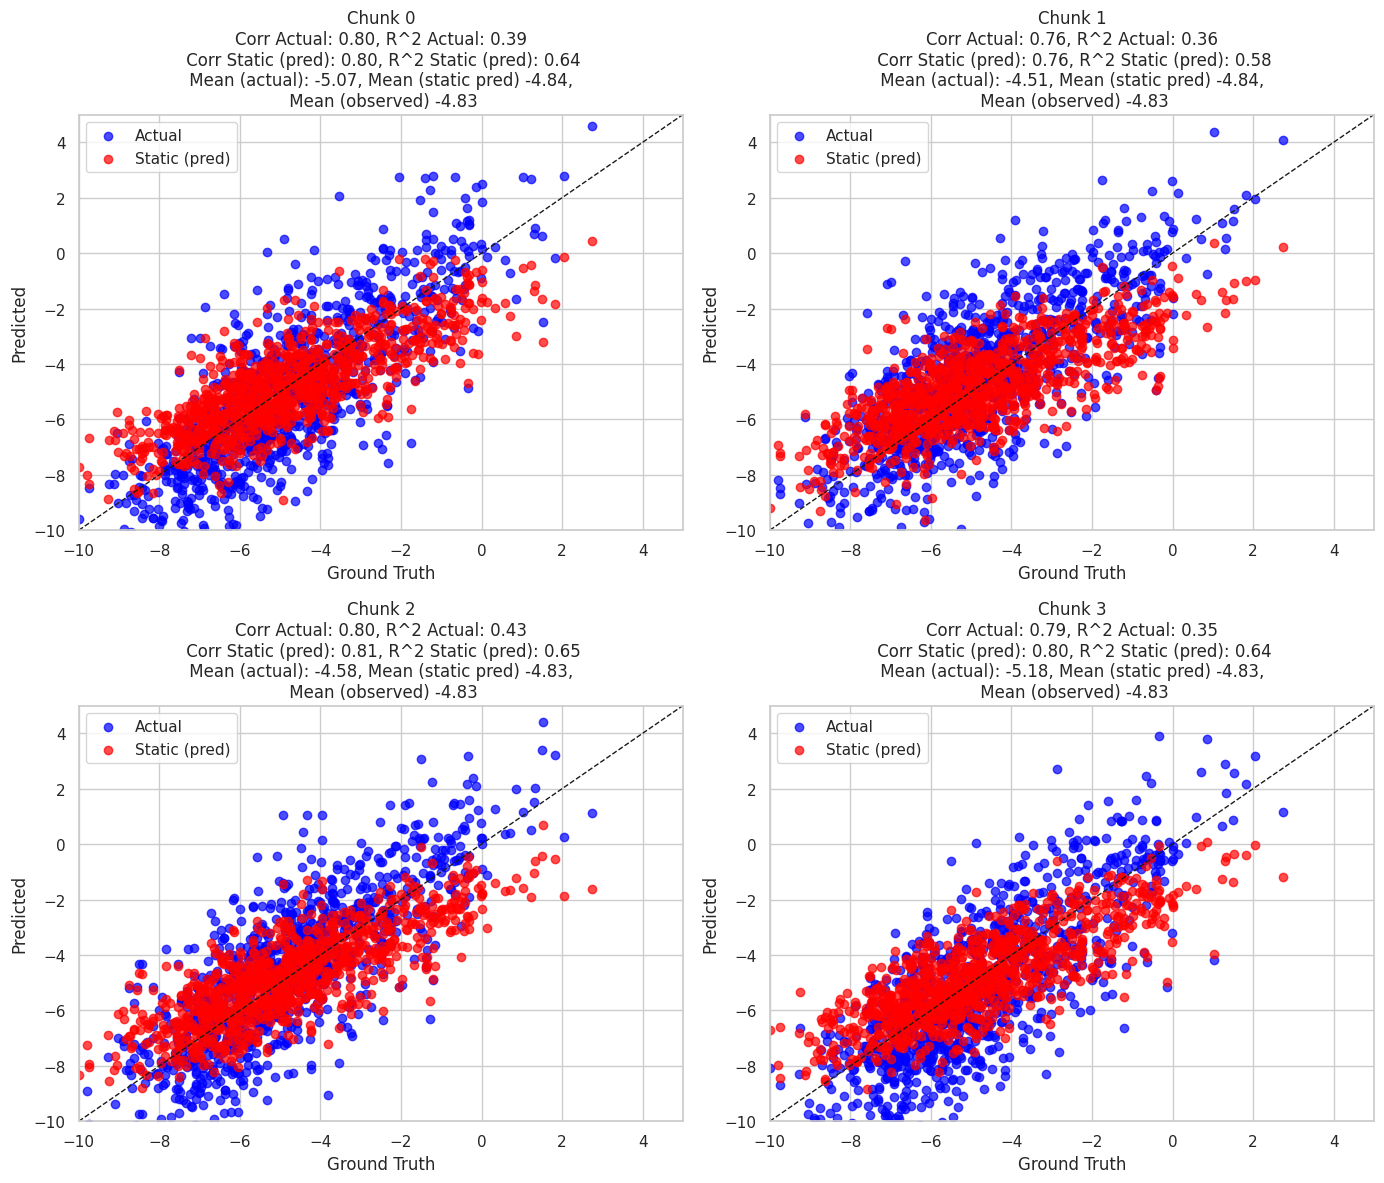

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming feature_prediction_dict and ground_truth_icov_reshape are already defined
a = feature_prediction_dict['actual']['netmats_flatten']
b = feature_prediction_dict['static']['predict_y']

# Define the number of chunks
n_chunks = 4
edge = 1  # Example edge index

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to easily access with a single index

for chunk in range(n_chunks):
    # Define your data
    actual = a[chunk, :, edge]
    static = b[chunk, :, edge]
    y = ground_truth_icov_reshape[:, edge]

    # Calculate correlation coefficients
    corr_actual_y = np.corrcoef(y, actual)[0, 1]
    corr_static_y = np.corrcoef(y, static)[0, 1]

    # Calculate R^2 scores
    r2_actual_y = r2_score(y, actual)
    r2_static_y = r2_score(y, static)

    # Scatter plot for ground truth vs actual
    axes[chunk].scatter(y, actual, color='blue', alpha=0.7, label='Actual')
    axes[chunk].scatter(y, static, color='red', alpha=0.7, label='Static (pred)')
    axes[chunk].set_title(f'Chunk {chunk}\nCorr Actual: {corr_actual_y:.2f}, R^2 Actual: {r2_actual_y:.2f}\n Corr Static (pred): {corr_static_y:.2f}, R^2 Static (pred): {r2_static_y:.2f}\n Mean (actual): {np.mean(actual):.2f}, Mean (static pred) {np.mean(static):.2f}, \n Mean (observed) {np.mean(y):.2f}')
    axes[chunk].set_xlabel('Ground Truth')
    axes[chunk].set_ylabel('Predicted')
    
    # Set axis limits
    axes[chunk].set_xlim(-10, 5)
    axes[chunk].set_ylim(-10, 5)
    
    # Add y=x line
    axes[chunk].plot([-10, 5], [-10, 5], 'k--', linewidth=1)
    
    axes[chunk].legend()
    axes[chunk].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

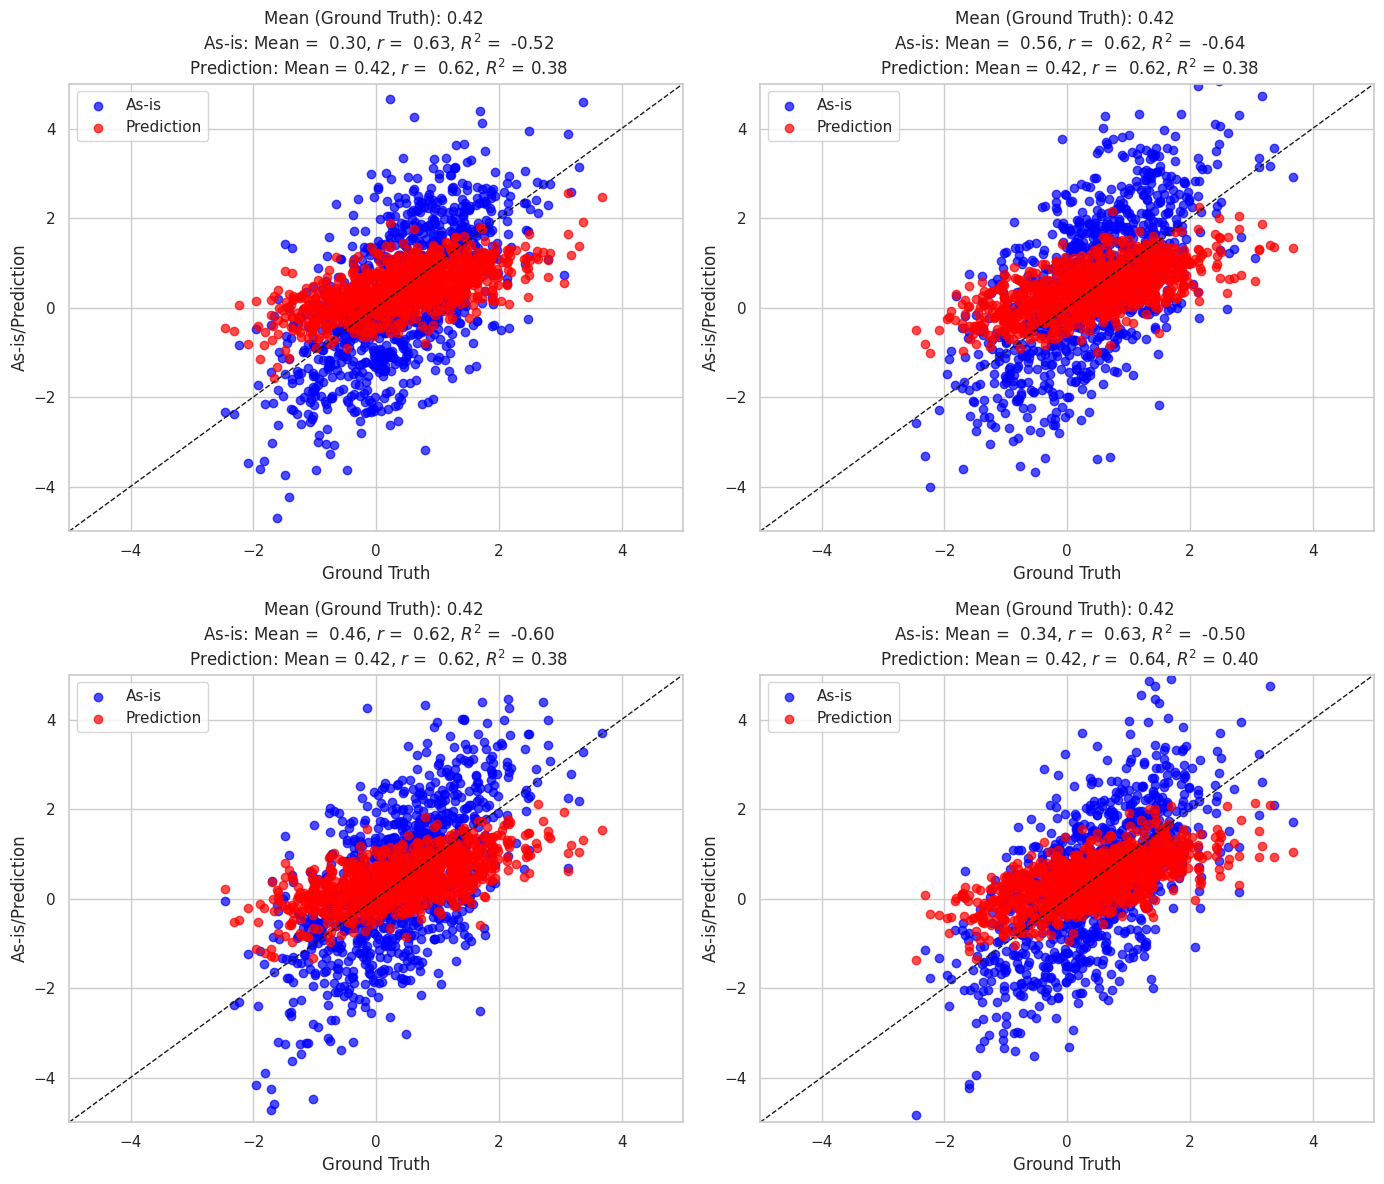

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming feature_prediction_dict and ground_truth_icov_reshape are already defined
a = feature_prediction_dict['actual']['netmats_flatten']
b = feature_prediction_dict['static']['predict_y']

# Define the number of chunks
n_chunks = 4
edge = 15  # Example edge index

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to easily access with a single index

for chunk in range(n_chunks):
    # Define your data
    actual = a[chunk, :, edge]
    static = b[chunk, :, edge]
    y = ground_truth_icov_reshape[:, edge]

    # Calculate correlation coefficients
    corr_actual_y = np.corrcoef(y, actual)[0, 1]
    corr_static_y = np.corrcoef(y, static)[0, 1]

    # Calculate R^2 scores
    r2_actual_y = r2_score(y, actual)
    r2_static_y = r2_score(y, static)

    # Scatter plot for ground truth vs actual
    axes[chunk].scatter(y, actual, color='blue', alpha=0.7, label='As-is')
    axes[chunk].scatter(y, static, color='red', alpha=0.7, label='Prediction')
    #axes[chunk].set_title(f'Chunk {chunk}\nCorr Actual: {corr_actual_y:.2f}, R^2 Actual: {r2_actual_y:.2f}\n Corr Static (pred): {corr_static_y:.2f}, R^2 Static (pred): {r2_static_y:.2f}\n Mean (actual): {np.mean(actual):.2f}, Mean (static pred) {np.mean(static):.2f}, \n Mean (observed) {np.mean(y):.2f}')
    axes[chunk].set_title(f'Mean (Ground Truth): {np.mean(y):.2f} \n As-is: Mean =  {np.mean(actual):.2f}, $r$ =  {corr_actual_y:.2f}, $R^2$ =  {r2_actual_y:.2f}\n Prediction: Mean = {np.mean(static):.2f}, $r$ =  {corr_static_y:.2f}, $R^2$ = {r2_static_y:.2f}')
    axes[chunk].set_xlabel('Ground Truth')
    axes[chunk].set_ylabel('As-is/Prediction')
    
    # Set axis limits
    axes[chunk].set_xlim(-5, 5)
    axes[chunk].set_ylim(-5, 5)
    
    # Add y=x line
    axes[chunk].plot([-5, 5], [-5, 5], 'k--', linewidth=1)
    
    axes[chunk].legend()
    axes[chunk].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<Figure size 1000x600 with 0 Axes>

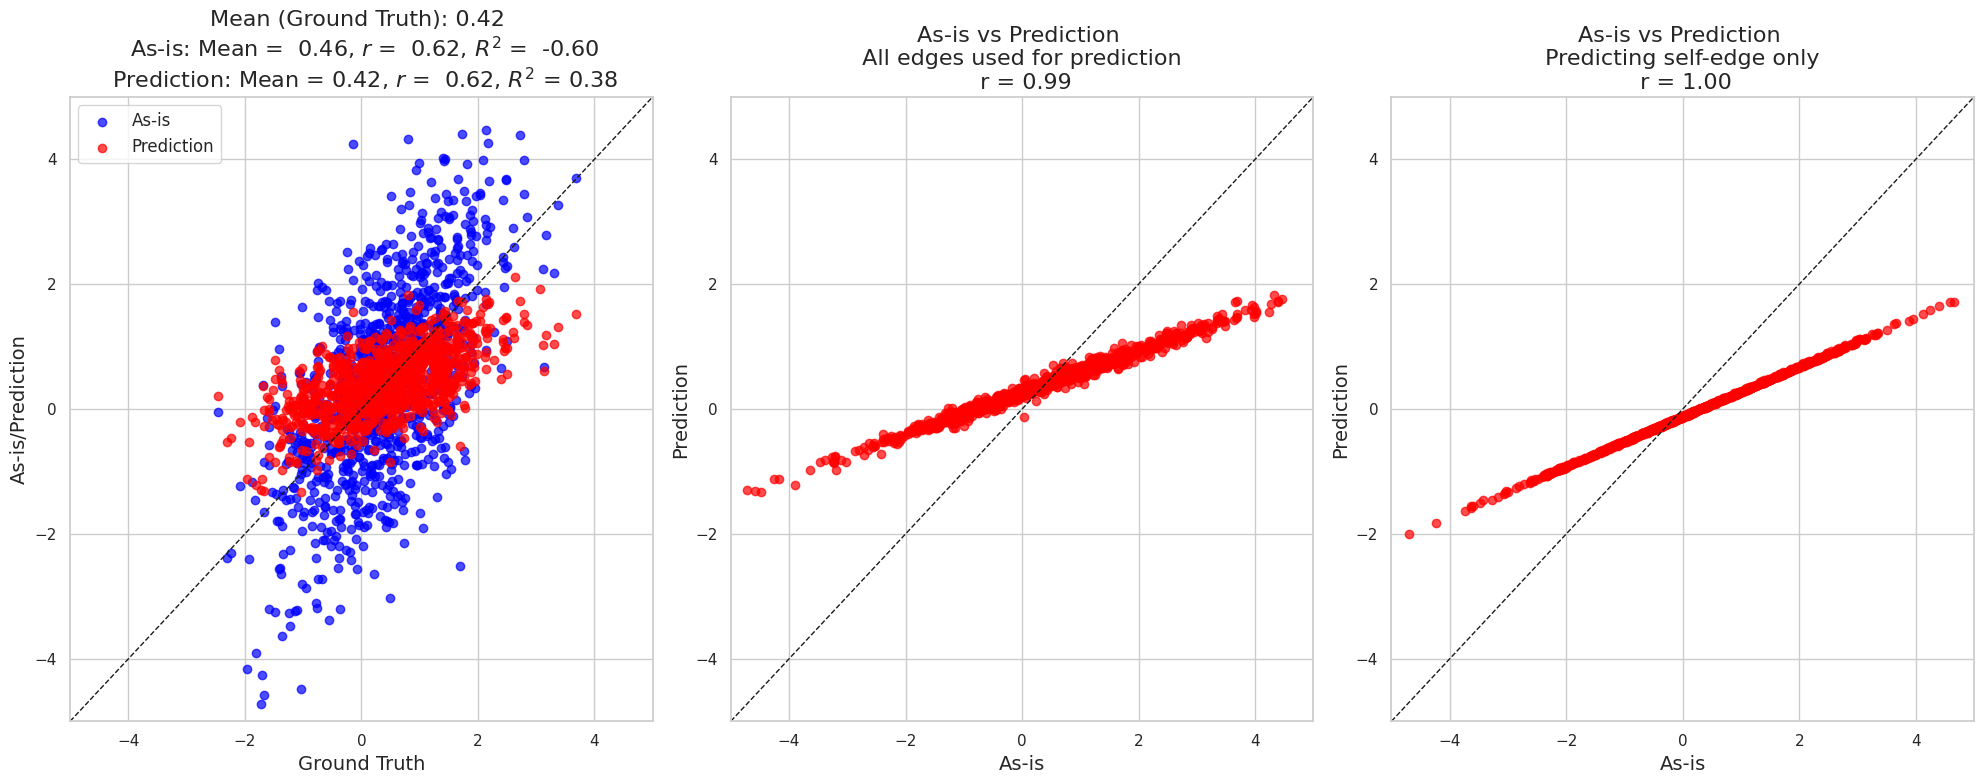

In [173]:
# Assuming feature_prediction_dict and ground_truth_icov_reshape are already defined
a = feature_prediction_dict['actual']['netmats_flatten']
b = feature_prediction_dict['static']['predict_y']

# Define the number of chunks
chunk = 2
edge = 15  # Example edge index

# Create subplots
plt.figure(figsize=(10, 6))

# Define your data
actual = a[chunk, :, edge]
static = b[chunk, :, edge]
y = ground_truth_icov_reshape[:, edge]

# Calculate correlation coefficients
corr_actual_y = np.corrcoef(y, actual)[0, 1]
corr_static_y = np.corrcoef(y, static)[0, 1]

# Calculate R^2 scores
r2_actual_y = r2_score(y, actual)
r2_static_y = r2_score(y, static)

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# Scatter plot for ground truth vs actual
ax1.scatter(y, actual, color='blue', alpha=0.7, label='As-is')
ax1.scatter(y, static, color='red', alpha=0.7, label='Prediction')
ax1.set_title(f'Mean (Ground Truth): {np.mean(y):.2f} \n As-is: Mean =  {np.mean(actual):.2f}, $r$ =  {corr_actual_y:.2f}, $R^2$ =  {r2_actual_y:.2f}\n Prediction: Mean = {np.mean(static):.2f}, $r$ =  {corr_static_y:.2f}, $R^2$ = {r2_static_y:.2f}', fontsize=16)
ax1.set_xlabel('Ground Truth', fontsize=14)
ax1.set_ylabel('As-is/Prediction', fontsize=14)

# Set axis limits
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)

# Add y=x line
ax1.plot([-5, 5], [-5, 5], 'k--', linewidth=1)

ax1.legend(fontsize=12)
ax1.grid(True)

# Scatter plot for actual vs prediction
ax2.scatter(actual, static, color='red', alpha=0.7, label='Prediction')
#ax2.scatter(x, predict_y, color='red', alpha=0.7, label='Prediction')
ax2.set_xlabel('As-is', fontsize=14)
ax2.set_ylabel('Prediction', fontsize=14)
ax2.set_title(f"As-is vs Prediction \n All edges used for prediction \n r = {np.corrcoef(actual, static)[0,1]:.2f}", fontsize=16)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax2.plot([-5, 5], [-5, 5], 'k--', linewidth=1)

# Scatter plot for actual vs prediction
ax3.scatter(x, predict_y, color='red', alpha=0.7, label='Prediction')
ax3.set_xlabel('As-is', fontsize=14)
ax3.set_ylabel('Prediction', fontsize=14)
ax3.set_title(f"As-is vs Prediction \n Predicting self-edge only \n r = {np.corrcoef(x, predict_y)[0,1]:.2f}", fontsize=16)
ax3.set_xlim(-5, 5)
ax3.set_ylim(-5, 5)
ax3.plot([-5, 5], [-5, 5], 'k--', linewidth=1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# to me this figure suggests that basiclly all we are doing is scaling the inputs
# so, you take a single edge from a 5 minute netmats (for all subjects) and compare
# it to the 60 minute netmats. From the training subjects, we learn that everything is
# too big by a factor of e.g., 2x. So, basically just take the netmats edge and divide by 2.
# we then repeat this using 10 fold CV so that we have predictions for all subjects.
# this gives us the plot on the right, because we simply divide the x-axis by 2 to get the y-axis
# the reason it's not perfectly linear, then, is because we actually use 325 edges to do the 
# prediction, but essentially only the single edge itself is important, the other edges just
# add a bit of noise
# (don't get confused by the ground truth being the x-axis on the left, because it has nothing
# to do with the right plot)

# 2 things to look into:
#  - How big is the self-edge predict beta, for this particular edge, compared to the rest (not that 
# other betas might be quite big if the FC magnitudes are extremely small for that edge)
#               Yes, they are much bigger so this makes sense
#  - If we just use one edge to predict one edge, does the right plot become perfectly linear then?
#               


In [142]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.model_selection import KFold, RepeatedKFold
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import ElasticNetCV


def run_elastic_net(x, y, bias_correct=0):
    # define model evaluation method (this is to determine the hyperparameters) so we use 5 folds here for hyperparameter optimzation but 10 later on for the prediction
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    ratios = np.arange(0, 1, 0.1)
    alphas = [1e-1, 0.0, 1.0, 10.0]

    model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, precompute=False)

    # define Kfold cross-validation
    n_folds = 10
    kf = KFold(n_splits=n_folds)

    x = x.reshape(-1, 1)

    predict_y = np.zeros_like(y)

    for fold, (train_index, test_index) in enumerate(kf.split(x)):

                # set up cross-validation folds
                X_train = x[train_index]
                y_train = y[train_index]
                X_test = x[test_index]
                y_test = y[test_index]

                # standardise X
                # X_train, X_test = HMMClass.standardise_train_apply_to_test(X_train, X_test)

                # # centre response
                # my = np.mean(y_train)
                # y_train = y_train - my

                # Train the model using the training set
                model.fit(X_train, y_train)

                # save chosen configuration
                # beta[i,fold,0:n_features] = model.coef_

                y_pred = model.predict(X_test)

                #return correlation
                # y_pred_train, correlation_train = HMMClass.evaluate_model(model, X_train, y_train, my)
                # y_pred, correlation = HMMClass.evaluate_model(model, X_test, y_test, my)
                predict_y[test_index] = y_pred

                if bias_correct:
                    y_pred_train = model.predict(X_train)
                    y_train_with_intercept = np.hstack((y_train.reshape(-1, 1), np.ones_like(y_train)))
                    b = np.linalg.pinv(y_train) * y_pred_train
                    predict_y[test_index] = (predict_y[test_index] - b[1]) / b[0]



    return predict_y

In [131]:
y.shape

(1003,)

In [160]:
# for one edge...
from sklearn.preprocessing import StandardScaler
# load up the edge of the 5 minute netmats and call it x
chunk = 0
edge = 15
x = feature_prediction_dict['actual']['netmats_flatten'][chunk, :, edge]
print(x.shape)

# load up the target (i.e., the edge for 60 minute netmats)
y = ground_truth_icov_reshape[:, edge]
print(y.shape)

# correlate x and y and find R^2
print(f"Correlation between edge for 5 min and 60 mins: {np.corrcoef(x, y)[0,1]}")
print(f"R^2 between edge for 5 min and 60 mins: {r2_score(y, x)}") # y_true is first (because fct not symmetric)

# de-mean y ONLY and recalculate the metrics
print(f"DE-MEAN Y: Correlation between edge for 5 min and 60 mins: {np.corrcoef(x, y-np.mean(y))[0,1]}")
print(f"DE-MEAN Y: R^2 between edge for 5 min and 60 mins: {r2_score(y-np.mean(y), x)}") # y_true is first (because fct not symmetric)

# de-mean x AND y and recalculate the metrics
print(f"DE-MEAN X and Y: Correlation between edge for 5 min and 60 mins: {np.corrcoef(x-np.mean(x), y-np.mean(y))[0,1]}")
print(f"DE-MEAN X and Y: R^2 between edge for 5 min and 60 mins: {r2_score(y-np.mean(y), x-np.mean(x))}") # y_true is first (because fct not symmetric)

# leave x and y as they are, run elastic net predictions, and calculate metrics
predict_y = run_elastic_net(x,y)
print(f"Prediction: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y, y)[0,1]}")
print(f"Prediction:  R^2 between edge for 5 min and 60 mins: {r2_score(y, predict_y)}") # y_true is first (because fct not symmetric)

# # de-mean y ONLY and run elastic net predictions, and calculate metrics
predict_y = run_elastic_net(x,y-np.mean(y))
print(f"Prediction: DE-MEAN Y: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y, y-np.mean(y))[0,1]}")
print(f"Prediction: DE-MEAN Y: R^2 between edge for 5 min and 60 mins: {r2_score(y-np.mean(y), predict_y)}") # y_true is first (because fct not symmetric)

# # de-mean x AND y and run elastic net predictions, and recalculate the metrics
predict_y = run_elastic_net(x-np.mean(x),y-np.mean(y))
print(f"Prediction: DE-MEAN X and Y: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y-np.mean(x), y-np.mean(y))[0,1]}")
print(f"Prediction: DE-MEAN X and Y: R^2 between edge for 5 min and 60 mins: {r2_score(y-np.mean(y), predict_y-np.mean(predict_y))}") # y_true is first (because fct not symmetric)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1)).ravel()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

print("Now let's scale x and y (which we could do without running predictions but it is still learning something from the target i.e., y_scaled so in some way it's still a kind of model/prediction, I guess? )")
print(f"Scaled: Correlation between edge for 5 min and 60 mins: {np.corrcoef(x_scaled, y_scaled)[0,1]}")
print(f"Scaled: R^2 between edge for 5 min and 60 mins: {r2_score(y_scaled, x_scaled)}") # y_true is first (because fct not symmetric)

print(f"Scaled y only: Correlation between edge for 5 min and 60 mins: {np.corrcoef(x, y_scaled)[0,1]}")
print(f"Scaled y only: R^2 between edge for 5 min and 60 mins: {r2_score(y_scaled, x)}") # y_true is first (because fct not symmetric)

print(f"Scaled x only: Correlation between edge for 5 min and 60 mins: {np.corrcoef(x_scaled, y)[0,1]}")
print(f"Scaled x only: R^2 between edge for 5 min and 60 mins: {r2_score(y, x_scaled)}") # y_true is first (because fct not symmetric)


(1003,)
(1003,)
Correlation between edge for 5 min and 60 mins: 0.6288522791230171
R^2 between edge for 5 min and 60 mins: -0.5208307996976074
DE-MEAN Y: Correlation between edge for 5 min and 60 mins: 0.6288522791230171
DE-MEAN Y: R^2 between edge for 5 min and 60 mins: -0.609011231064287
DE-MEAN X and Y: Correlation between edge for 5 min and 60 mins: 0.6288522791230171
DE-MEAN X and Y: R^2 between edge for 5 min and 60 mins: -0.5068861346167108
Prediction: Correlation between edge for 5 min and 60 mins: 0.6272862789064219
Prediction:  R^2 between edge for 5 min and 60 mins: 0.3934814670260085
Prediction: DE-MEAN Y: Correlation between edge for 5 min and 60 mins: 0.6272862789064219
Prediction: DE-MEAN Y: R^2 between edge for 5 min and 60 mins: 0.3934814670260085
Prediction: DE-MEAN X and Y: Correlation between edge for 5 min and 60 mins: 0.6272862789064219
Prediction: DE-MEAN X and Y: R^2 between edge for 5 min and 60 mins: 0.39348147447100235
Now let's scale x and y (which we could 

In [144]:
# bias_correct = 0
# predict_y = run_elastic_net(x,y, bias_correct)
# print(f"Prediction: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y, y)[0,1]}")
# print(f"Prediction:  R^2 between edge for 5 min and 60 mins: {r2_score(y, predict_y)}") # y_true is first (because fct not symmetric)

In [145]:
bias_correct = 1
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
ratios = np.arange(0, 1, 0.1)
alphas = [1e-1, 0.0, 1.0, 10.0]

model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, precompute=False)

# define Kfold cross-validation
n_folds = 10
kf = KFold(n_splits=n_folds)

x = x.reshape(-1, 1)

predict_y = np.zeros_like(y)
predict_y_bc = np.zeros_like(y)
predict_y_bc_intercept = np.zeros_like(y)
predict_y_rotated = np.zeros_like(y)

for fold, (train_index, test_index) in enumerate(kf.split(x)):

            # set up cross-validation folds
            X_train = x[train_index]
            y_train = y[train_index]
            X_test = x[test_index]
            y_test = y[test_index]

            # standardise X
            # X_train, X_test = HMMClass.standardise_train_apply_to_test(X_train, X_test)

            # # centre response
            # my = np.mean(y_train)
            # y_train = y_train - my

            # Train the model using the training set
            model.fit(X_train, y_train)

            # save chosen configuration
            # beta[i,fold,0:n_features] = model.coef_

            y_pred = model.predict(X_test)

            #return correlation
            # y_pred_train, correlation_train = HMMClass.evaluate_model(model, X_train, y_train, my)
            # y_pred, correlation = HMMClass.evaluate_model(model, X_test, y_test, my)
            predict_y[test_index] = y_pred

            if bias_correct:
                # make predictions using the training data
                y_pred_train = model.predict(X_train)

                # if we want to do it with an intercept
                y_train_with_intercept = np.hstack((y_train.reshape(-1, 1), np.ones_like(y_train.reshape(-1, 1)))) # add intercept
                b = np.linalg.pinv(y_train_with_intercept) @ y_pred_train # solve for beta
                predict_y_bc[test_index] = (predict_y[test_index] - b[1]) / b[0] # correct original predictions

                

                # # # or need to de-mean data to not do it with an intercept term
                # my = np.mean(y_pred_train)
                # y_pred_train = y_pred_train - my
                # my2 = np.mean(y_train)
                # y_train = y_train - my2

                # y_train_without_intercept = y_train.reshape(-1, 1)
                # b2 = np.linalg.pinv(y_train_without_intercept) @ y_pred_train
                # #b3 = np.linalg.inv(y_train_without_intercept.T.dot(y_train_without_intercept)).dot(y_train_without_intercept.T).dot(y_pred_train) # manual implementation of Moore–Penrose pseudo inverse
                # #predict_y_bc[test_index] = (predict_y[test_index] - my) / b2[0] # bias correct the original predictions
                # predict_y_bc[test_index] = (predict_y[test_index] - my) / b2[0] # bias correct the original predictions
                # predict_y_bc[test_index] = predict_y_bc[test_index] + my # add mean back in

                # Fit lines of best fit
                # coeffs_y_train = np.polyfit(y_train, y_pred_train, 1)

                # Combine y and predict_y into a single array for rotation
                # blue_data = np.vstack([y_train, y_pred_train]).T

                # # Apply the rotation matrix to the blue data points
                # blue_data_rotated = blue_data @ rotation_matrix.T

                # # Extract rotated coordinates
                # y_rotated = blue_data_rotated[:, 0]
                # predict_y_rotated = blue_data_rotated[:, 1]
                
                # attempt 2
                # blue_data = np.vstack([y_test, predict_y[test_index]]).T
                # blue_data_rotated = blue_data @ rotation_matrix.T
                # y_rotated = blue_data_rotated[:, 0]
                # predict_y_rotated[test_index] = blue_data_rotated[:, 1]

                # m1 = coeffs_y_train[0] 
                # m2 = 1

                # angle_rad = np.arctan(np.abs((m1 - m2) / (1 + m1 * m2)))

                # rotation_matrix = np.array([
                #     [np.cos(-angle_rad), -np.sin(-angle_rad)],
                #     [np.sin(-angle_rad),  np.cos(-angle_rad)]
                # ])

                # # attempt 3
                # #predict_y_rotated[test_index] = predict_y[test_index] * np.cos(angle_rad) # np.sin(angle_rad)
                # test_data = np.vstack([predict_y[test_index], predict_y[test_index]]).T
                # test_data_rotated = test_data @ rotation_matrix.T
                # predict_y_rotated[test_index] = test_data_rotated[:, 1]

                # predict_y_rotated[test_index] = predict_y[test_index] * np.cos(angle_rad) # np.sin(angle_rad)



print(f"Prediction: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y, y)[0,1]}")
print(f"Prediction:  R^2 between edge for 5 min and 60 mins: {r2_score(y, predict_y)}") # y_true is first (because fct not symmetric
print("bias correct")
print(f"Prediction: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y_bc, y)[0,1]}")
print(f"Prediction:  R^2 between edge for 5 min and 60 mins: {r2_score(y, predict_y_bc)}") # y_true is first (because fct not symmetric
print("bias correct with intercept")
print(f"Prediction: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y_bc_intercept, y)[0,1]}")
print(f"Prediction:  R^2 between edge for 5 min and 60 mins: {r2_score(y, predict_y_bc_intercept)}") # y_true is first (because fct not symmetric

# print("bias correct rotated")
# print(f"Prediction: Correlation between edge for 5 min and 60 mins: {np.corrcoef(predict_y_rotated, y)[0,1]}")
# print(f"Prediction:  R^2 between edge for 5 min and 60 mins: {r2_score(y, predict_y_rotated)}") # y_true is first (because fct not symmetric

Prediction: Correlation between edge for 5 min and 60 mins: 0.6272862789064219
Prediction:  R^2 between edge for 5 min and 60 mins: 0.3934814670260085
bias correct
Prediction: Correlation between edge for 5 min and 60 mins: 0.6279331245316015
Prediction:  R^2 between edge for 5 min and 60 mins: -0.5387208519661522
bias correct with intercept
Prediction: Correlation between edge for 5 min and 60 mins: nan
Prediction:  R^2 between edge for 5 min and 60 mins: -0.19154426759020682


/users/win-fmrib-analysis/psz102/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/users/win-fmrib-analysis/psz102/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [135]:
ccc

NameError: name 'ccc' is not defined

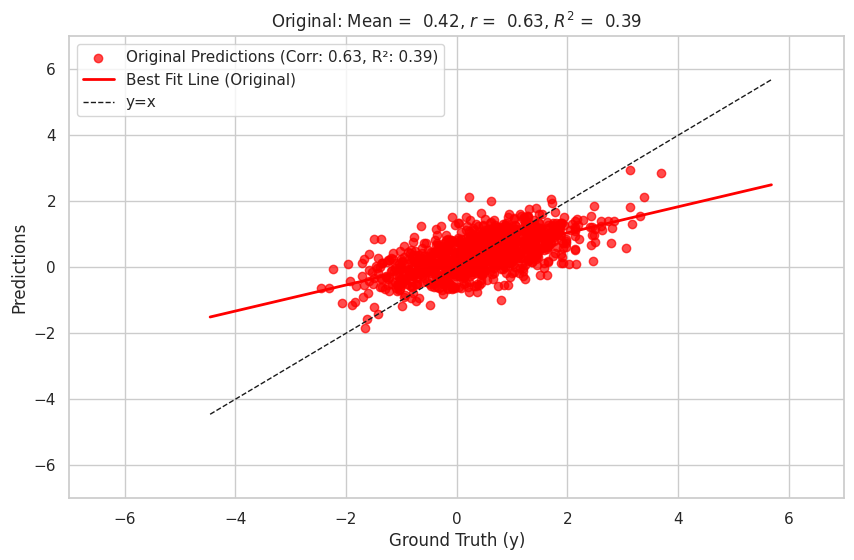

In [146]:
# Fit lines of best fit
coeffs_y_train = np.polyfit(y_train, y_pred_train, 1)
coeffs_y = np.polyfit(y, predict_y, 1)
#predict_y_bc = predict_y_bc_intercept
coeffs_y_rotate = np.polyfit(y, predict_y_bc, 1)

# Calculate best fit lines
x_vals = np.linspace(min(min(y_train), min(y)) - 2, max(max(y_train), max(y)) + 2, 100)
best_fit_line_y = np.polyval(coeffs_y, x_vals)
best_fit_line_y_rotate = np.polyval(coeffs_y_rotate, x_vals)

# Calculate correlations and R² scores
corr_predict_y = np.corrcoef(y, predict_y)[0, 1]
corr_predict_y_bc = np.corrcoef(y, predict_y_bc)[0, 1]
r2_predict_y = r2_score(y, predict_y)
r2_predict_y_bc = r2_score(y, predict_y_bc)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot red data
plt.scatter(y, predict_y, color='red', alpha=0.7, label=f'Original Predictions (Corr: {corr_predict_y:.2f}, R²: {r2_predict_y:.2f})')

# Plot green data (bias corrected)
#plt.scatter(y, predict_y_bc, color='green', alpha=0.7, label=f'Bias Corrected Predictions (Corr: {corr_predict_y_bc:.2f}, R²: {r2_predict_y_bc:.2f})')

# Plot best fit lines
plt.plot(x_vals, best_fit_line_y, color='red', linestyle='-', linewidth=2, label='Best Fit Line (Original)')
#plt.plot(x_vals, best_fit_line_y_rotate, color='green', linestyle='-', linewidth=2, label='Best Fit Line (Corrected)')

# Add y=x line
plt.plot(x_vals, x_vals, 'k--', linewidth=1, label='y=x')

# Set plot title and labels
#plt.title('Scatter Plot of Original and Corrected Predictions with Best Fit Lines')
plt.title(f'Original: Mean =  {np.mean(predict_y):.2f}, $r$ =  {corr_predict_y:.2f}, $R^2$ =  {r2_predict_y:.2f}')
plt.xlabel('Ground Truth (y)')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)

# Set x and y limits
plt.xlim(-7, 7)
plt.ylim(-7, 7)

# Show the plot
plt.show()



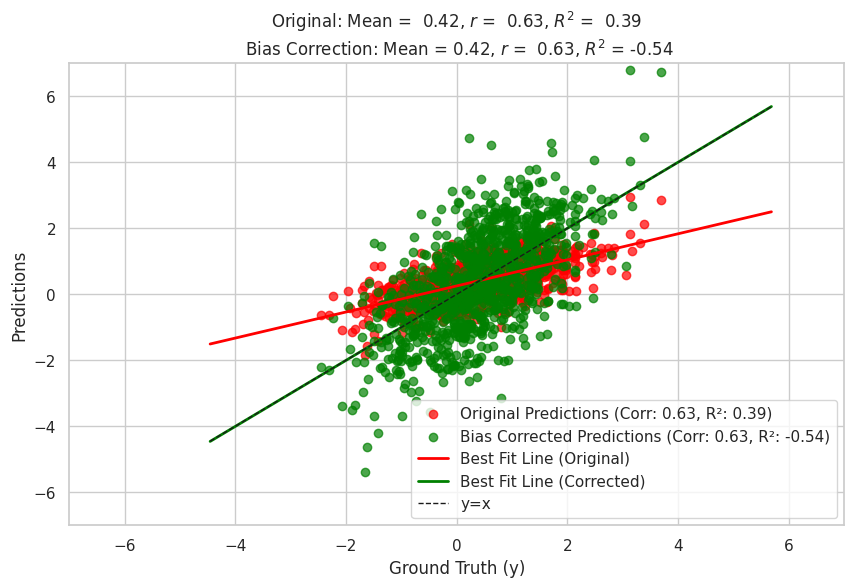

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Sample data (replace these with your actual data)
# y_train = ...
# y_pred_train = ...
# y = ...
# predict_y = ...
# predict_y_bc = ...

# Fit lines of best fit
coeffs_y_train = np.polyfit(y_train, y_pred_train, 1)
coeffs_y = np.polyfit(y, predict_y, 1)
#predict_y_bc = predict_y_bc_intercept
coeffs_y_rotate = np.polyfit(y, predict_y_bc, 1)

# Calculate best fit lines
x_vals = np.linspace(min(min(y_train), min(y)) - 2, max(max(y_train), max(y)) + 2, 100)
best_fit_line_y = np.polyval(coeffs_y, x_vals)
best_fit_line_y_rotate = np.polyval(coeffs_y_rotate, x_vals)

# Calculate correlations and R² scores
corr_predict_y = np.corrcoef(y, predict_y)[0, 1]
corr_predict_y_bc = np.corrcoef(y, predict_y_bc)[0, 1]
r2_predict_y = r2_score(y, predict_y)
r2_predict_y_bc = r2_score(y, predict_y_bc)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot red data
plt.scatter(y, predict_y, color='red', alpha=0.7, label=f'Original Predictions (Corr: {corr_predict_y:.2f}, R²: {r2_predict_y:.2f})')

# Plot green data (bias corrected)
plt.scatter(y, predict_y_bc, color='green', alpha=0.7, label=f'Bias Corrected Predictions (Corr: {corr_predict_y_bc:.2f}, R²: {r2_predict_y_bc:.2f})')

# Plot best fit lines
plt.plot(x_vals, best_fit_line_y, color='red', linestyle='-', linewidth=2, label='Best Fit Line (Original)')
plt.plot(x_vals, best_fit_line_y_rotate, color='green', linestyle='-', linewidth=2, label='Best Fit Line (Corrected)')

# Add y=x line
plt.plot(x_vals, x_vals, 'k--', linewidth=1, label='y=x')

# Set plot title and labels
#plt.title('Scatter Plot of Original and Corrected Predictions with Best Fit Lines')
plt.title(f'Original: Mean =  {np.mean(predict_y):.2f}, $r$ =  {corr_predict_y:.2f}, $R^2$ =  {r2_predict_y:.2f}\n Bias Correction: Mean = {np.mean(predict_y_bc):.2f}, $r$ =  {corr_predict_y_bc:.2f}, $R^2$ = {r2_predict_y_bc:.2f}')
plt.xlabel('Ground Truth (y)')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)

# Set x and y limits
plt.xlim(-7, 7)
plt.ylim(-7, 7)

# Show the plot
plt.show()



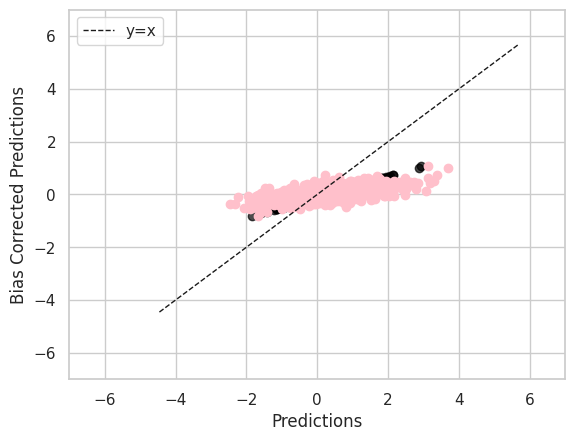

In [141]:

# Plot red data
plt.scatter(predict_y, predict_y_bc, color='black', alpha=0.7)

plt.scatter(y, predict_y_bc, color='pink')#, alpha=0.7)

# Plot best fit lines
#plt.plot(x_vals, best_fit_line_y, color='red', linestyle='-', linewidth=2, label='Best Fit Line (Original)')
#plt.plot(x_vals, best_fit_line_y_rotate, color='green', linestyle='-', linewidth=2, label='Best Fit Line (Corrected)')

# Add y=x line
plt.plot(x_vals, x_vals, 'k--', linewidth=1, label='y=x')

# Set plot title and labels
#plt.title('Scatter Plot of Original and Corrected Predictions with Best Fit Lines')
#plt.title(f'Original: Mean =  {np.mean(predict_y):.2f}, $r$ =  {corr_predict_y:.2f}, $R^2$ =  {r2_predict_y:.2f}\n Bias Correction: Mean = {np.mean(predict_y_bc):.2f}, $r$ =  {corr_predict_y_bc:.2f}, $R^2$ = {r2_predict_y_bc:.2f}')
plt.xlabel('Predictions')
plt.ylabel('Bias Corrected Predictions')
plt.legend()
plt.grid(True)

# Set x and y limits
plt.xlim(-7, 7)
plt.ylim(-7, 7)

# Show the plot
plt.show()

In [ ]:
# print(b, b2, b3)
# print(y_train_without_intercept.shape, y_pred_train.shape)
# y_p_recreate = (y_train_without_intercept * b2)
# print(y_p_recreate.shape)
# print(y_p_recreate[0:5])
# print(y_pred_train[0:5])

# # print(y_train_without_intercept.shape)
# # print(y_pred_train.shape)
# # print(np.mean(y_train_without_intercept), np.mean(y_pred_train))
# # print(np.corrcoef(y_train_without_intercept.ravel(), y_pred_train)[0,1])

# # np.mean(predict_y[test_index])

# # print(np.mean(y_pred_train), np.mean(y_train), np.mean(y_train_without_intercept))
# # print(np.corrcoef(y_train, y_pred_train)[0,1])

# # print(my)
# # print(np.mean(predict_y_bc_intercept))
# # print(np.mean(predict_y_bc))

# # print(y_pred_train.shape, y_train.shape)
# # print(y_pred_train[0:5], y_train[0:5])

# # print(np.mean(y_pred_train), np.mean(y_train))

# print(y_pred_train.shape) # these are the predictions for the training subjects
# print(np.corrcoef(y_pred_train, y_train)[0,1]) # the predictions for the training subjects are ~0.62 correlated with the targetes
# print(np.corrcoef(y, predict_y)[0,1]) # this is similar for the test subjects


# print(y_train.shape)
# print(y_train[0:5])
# print(y_train_with_intercept.shape)
# print(y_train_with_intercept[0:5, :])
# print(b.shape)
# print(b)

# a = (y_train_with_intercept @ b[0]) + b[1]
# print(a.shape)
# print(a[0:5,])

# y_pred_train.shape

# print(y_train_with_intercept.shape)
# print(np.linalg.pinv(y_train_with_intercept).shape)
# print(y_pred_train.shape)

# print(np.mean(predict_y))
# print(np.mean(y))
# print(np.mean(predict_y_bc))

In [13]:
##################### Plot bar chart of accuracies across HMM feature groups ########################


# let's combine the prediction accuracies for each hmm features into a combined array
hmm_features_accuracy = np.zeros((n_feat_type, n_chunk, n_edge))
hmm_features_r2_accuracy = np.zeros((n_feat_type, n_chunk, n_edge))
# hmm_features_mse_accuracy = np.zeros((n_feat_type, n_chunk, n_edge))
feat_num = 0
labels = []
for key, feature in feature_prediction_dict.items():
    print(feature)
    hmm_features_accuracy[feat_num,:,:] = feature['accuracy_per_edge']
    hmm_features_r2_accuracy[feat_num,:,:] = feature['r2_accuracy_per_edge']
    labels.append(key) # create labels for plot
    
    feat_num += 1


In [14]:
# if n_chunk==12:
labels[0] = 'Static (as-is)'
labels[1] = 'Weighted Covariances \n (by FO) (as-is)'
labels[2] = 'Weighted Partial \n Correlations (by FO) (as-is)'
labels[3] = 'Static (predict)'
labels[4] = 'Full Covariances \n of HMM states'
labels[5] = 'Partial Correlations \n of HMM states'
labels[6] = 'State means'
labels[7] = 'TPMs and \n Summary Stats'
labels[8] = 'TPMs and \n Summary Stats (ONLY)'
labels[9] = 'Static (plus pca)'
labels[10] = 'Static (connecting edges)'
# labels[7] = 'Weighted Covariances \n (by FO)'
# labels[8] = 'Weighted Partial \n Correlations (by FO)'

# elif n_chunk==4:
#     labels[0] = 'Static (as-is)'
#     labels[1] = 'Static (predict)'
#     labels[2] = 'Full Covariances \n of HMM states'
#     labels[3] = 'Partial Correlations \n of HMM states'
#     labels[4] = 'ALL HMM features'
#     labels[5] = 'State means'
#     labels[6] = 'TPMs and \n Summary Stats'
#     labels[7] = 'TPMs and \n Summary Stats (ONLY)'
#     labels[8] = 'Weighted Covariances \n (by FO)'
#     labels[9] = 'Weighted Partial \n Correlations (by FO)'
#     labels[10] = 'Weighted Covariances \n (by FO) ACTUAL'
#     labels[11] = 'Weighted Partial \n Correlations (by FO) ACTUAL'

# print(*feature_prediction_dict['static'])

/tmp/ipykernel_227839/1225740383.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('twilight_shifted')


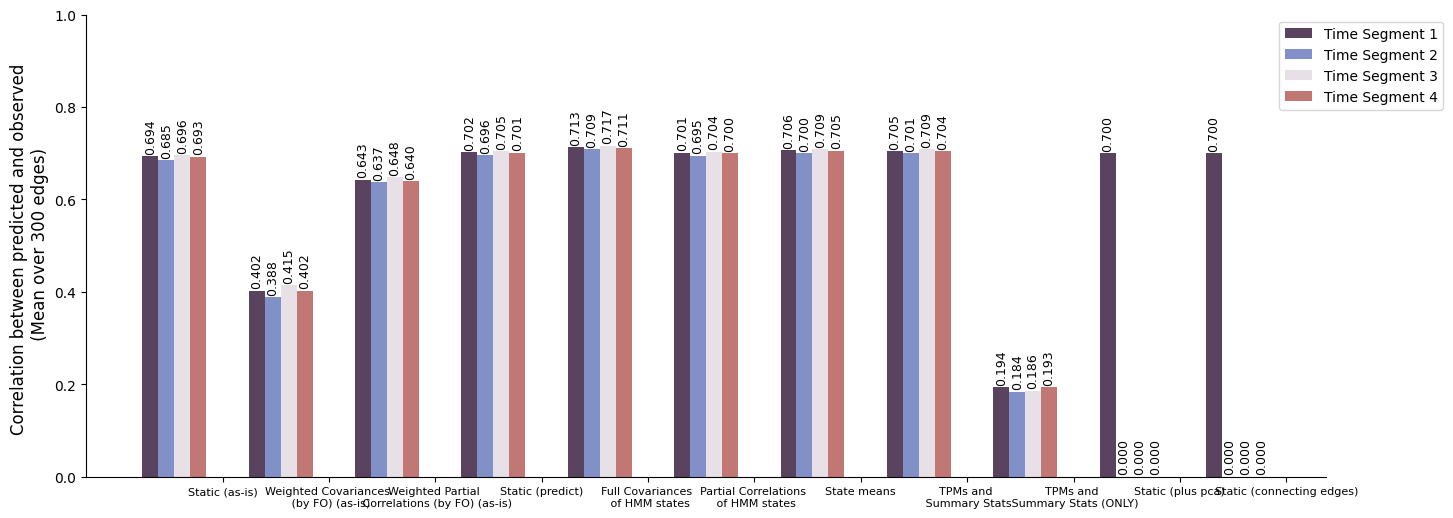

2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy should be finite values
2024-08-04 14:35:41 WARNING matplotlib.text [text.py:761:draw]: posx and posy shou

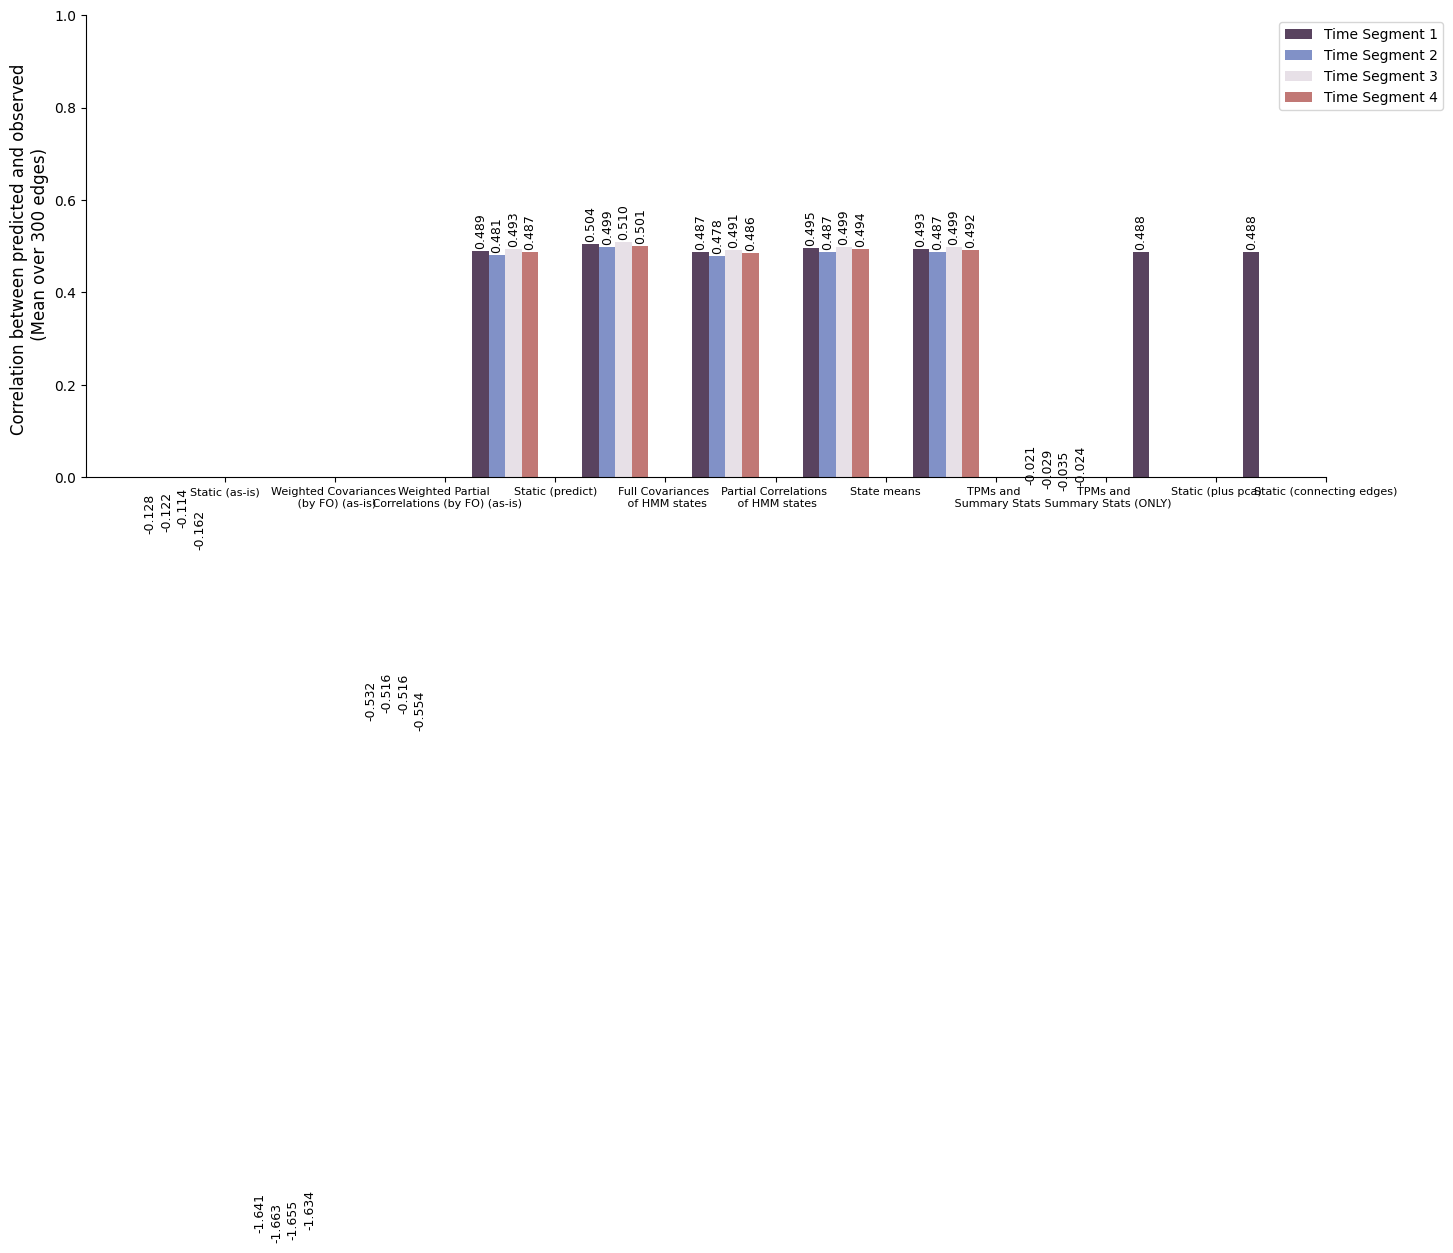

In [15]:
# if we want to remove nan subjects see commented code at end of script

# Here we split up the accuracy of the chunks for using partial correlations to predict partial correlations
# Create a colormap with a smooth transition of colors
cmap = cm.get_cmap('twilight_shifted')

# Define the number of colors needed
num_colors = n_chunk

# Get a list of colors from the colormap
colors = [cmap(i / num_colors) for i in range(num_colors)]

for plot_acc in range(2):

    # Create a new figure for the grouped bar chart with a larger size
    fig, ax = plt.subplots(figsize=(16, 6))

    # Set bar width, group offset, and x-positions of bars
    x = np.arange(len(labels))
    if n_chunk == 4:
        bar_width = 0.15
        group_offset = (len(labels)) * bar_width
    elif n_chunk == 12:
        bar_width = 0.05
        group_offset = (len(labels) + 8) * bar_width

    # Iterate over the traits
    for i in range(n_chunk):
        if plot_acc == 0:
            chunk_plot = hmm_features_accuracy[:,i,:]
        elif plot_acc ==1:
            chunk_plot = hmm_features_r2_accuracy[:,i,:]
        elif plot_acc ==2:
            chunk_plot = hmm_features_mse_accuracy[:,i,:]

        # Calculate the mean values for each bar
        means = np.mean(chunk_plot, axis=1)

        # Calculate the x-axis positions for the bars within a group
        x_grouped = x + (i - 2) * bar_width - group_offset + 0.37

        # Plot the bars within a group
        bars = ax.bar(x_grouped, means, width=bar_width, color=colors[i % num_colors], alpha=0.8)

        # Add text labels on top of each bar with decreased fontsize
        for bar in bars:
            height = bar.get_height()
            if n_chunk == 4:
                ax.text(bar.get_x() + bar.get_width() / 2, height+0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=9, rotation=90)
            elif n_chunk == 12:
                ax.text(bar.get_x() + bar.get_width() / 2, height+0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=6, rotation=90)

    # Set the y-axis label
    ax.set_ylabel('Correlation between predicted and observed \n (Mean over 300 edges)', fontsize=12)

    # Set the x-axis tick labels and move them to the left
    if n_chunk == 4:
        ax.set_xticks(x - 0.9)
    elif n_chunk == 12:
        ax.set_xticks(x - 0.25)

    ax.set_xticklabels(labels, fontsize=8)

    # Add a legend for the eight bars
    ax.legend(labels=['Time Segment ' + str(i+1) for i in range(n_chunk)], loc='upper right', bbox_to_anchor=(1.1, 1.0))

    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Set the y-axis limits to range from 0.7 to 1
    ax.set_ylim(0, 1)
    #ax.set_ylim(np.nanmin(means)-0.05, np.nanmax(means)+0.1)

    # Remove the grid
    ax.grid(False)

    # Set the color of the x and y axis lines to black
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

    # Show the plot
    plt.show()

In [ ]:
# exploring tpms_ss_only
print(feature_prediction_dict['tpms_ss_only']['predict_y'][:,:,176].shape)
print(ground_truth_icov_reshape[:, 176].shape)
np.corrcoef(feature_prediction_dict['tpms_ss_only']['predict_y'][:,:,176], ground_truth_icov_reshape[:, 176])
print(feature_prediction_dict['tpms_ss_only']['predict_y'][:,0:10,176].shape)
print(ground_truth_icov_reshape[0:10, 176].shape)

print(np.argmax(np.mean(hmm_features_accuracy[8],axis=0)))
print(hmm_features_accuracy[8][:,176])
print(*feature_prediction_dict['tpms_ss_only'])
print(feature_prediction_dict['tpms_ss_only']['beta'].shape)
print(feature_prediction_dict['tpms_ss_only']['beta'][:,0,176,:].shape)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the arrays are already loaded in feature_prediction_dict and ground_truth_icov_reshape
predict_y = feature_prediction_dict['tpms_ss_only']['predict_y'][:, 0:10, 176]
ground_truth = ground_truth_icov_reshape[0:10, 176]

# Combine the data for comparison
comparison_data = np.vstack([predict_y, ground_truth[np.newaxis, :]])

# Create a DataFrame for better visualization
df_comparison = pd.DataFrame(comparison_data.T, columns=[f'Predict_y_set_{i+1}' for i in range(predict_y.shape[0])] + ['Ground_Truth'])

# Display the DataFrame
print(df_comparison)


(4, 1003)
(1003,)
(4, 10)
(10,)
194
[0.55256623 0.56119924 0.51830959 0.55416483]
alpha l1_ratio corr_y predict_y beta accuracy_per_edge r2_accuracy_per_edge
(4, 10, 300, 96)
(4, 96)
   Predict_y_set_1  Predict_y_set_2  Predict_y_set_3  Predict_y_set_4  \
0         1.329537         0.658958         0.891494         0.814548   
1         1.574077         1.516970         2.028082         1.446109   
2         1.464178         0.015828         0.341262         0.490832   
3         1.278655         1.458332         1.220896         0.968463   
4         1.739830         2.161681         1.658851         1.088578   
5         0.988784         0.433069         0.308267         0.298006   
6         0.875971         0.655571         1.320354         1.364154   
7         1.272726        -0.607069         0.864956         0.278750   
8         0.561635         0.981688         0.298796         0.201505   
9         0.423555        -0.064981         1.150508         0.817726   

   Ground_Tru

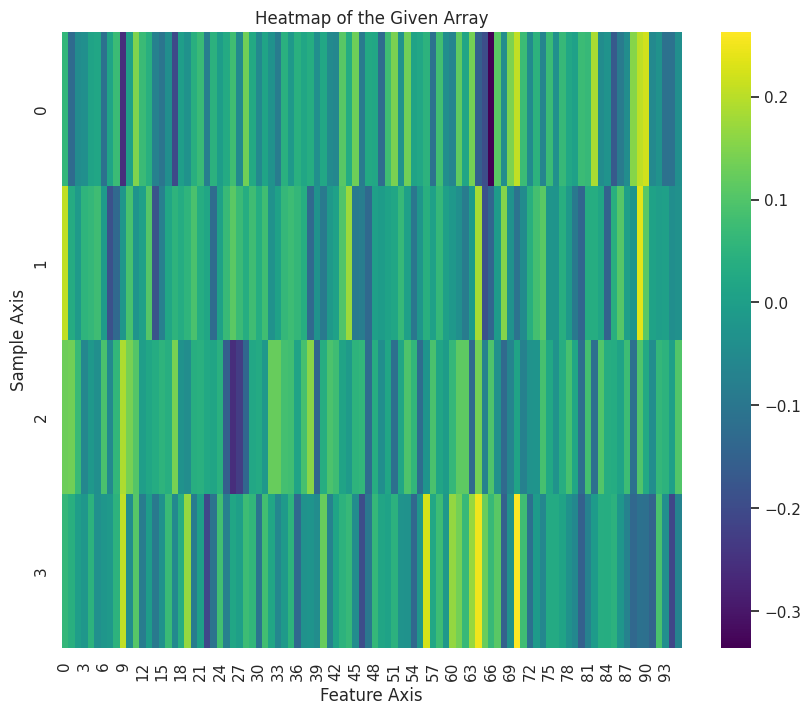

In [ ]:
array_to_plot = feature_prediction_dict['tpms_ss_only']['beta'][:,0,176,:]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(array_to_plot, cmap='viridis', annot=False)
plt.title('Heatmap of the Given Array')
plt.xlabel('Feature Axis')
plt.ylabel('Sample Axis')
plt.show()

# tpm = 0:63
# fo = 64:71
# intv = 72:79
# lt = 80:87
# sr = 88:95

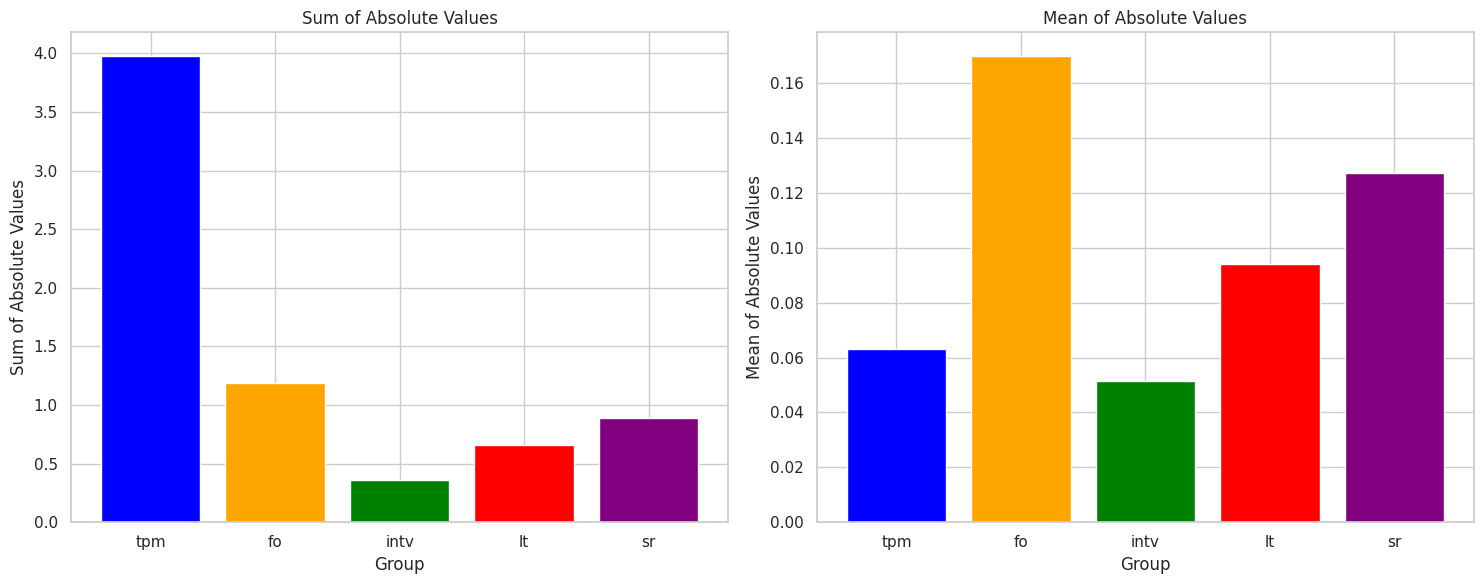

In [ ]:
array_to_plot = feature_prediction_dict['tpms_ss_only']['beta'][0, 0, 176, :]

# Grouping the elements
tpm = np.abs(array_to_plot[0:63])
fo = np.abs(array_to_plot[64:71])
intv = np.abs(array_to_plot[72:79])
lt = np.abs(array_to_plot[80:87])
sr = np.abs(array_to_plot[88:95])

# Summing and calculating the mean of the absolute values in each group
sums = {
    'tpm': np.sum(tpm),
    'fo': np.sum(fo),
    'intv': np.sum(intv),
    'lt': np.sum(lt),
    'sr': np.sum(sr)
}

means = {
    'tpm': np.mean(tpm),
    'fo': np.mean(fo),
    'intv': np.mean(intv),
    'lt': np.mean(lt),
    'sr': np.mean(sr)
}

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the sum bar chart
axes[0].bar(sums.keys(), sums.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
axes[0].set_title('Sum of Absolute Values')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Sum of Absolute Values')

# Plotting the mean bar chart
axes[1].bar(means.keys(), means.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
axes[1].set_title('Mean of Absolute Values')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Mean of Absolute Values')

plt.tight_layout()
plt.show()



11
(1200,)


/tmp/ipykernel_227839/2585636892.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors)
/tmp/ipykernel_227839/2585636892.py:23: UserWarning: 
The palette list has fewer values (7) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors)
/tmp/ipykernel_227839/2585636892.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


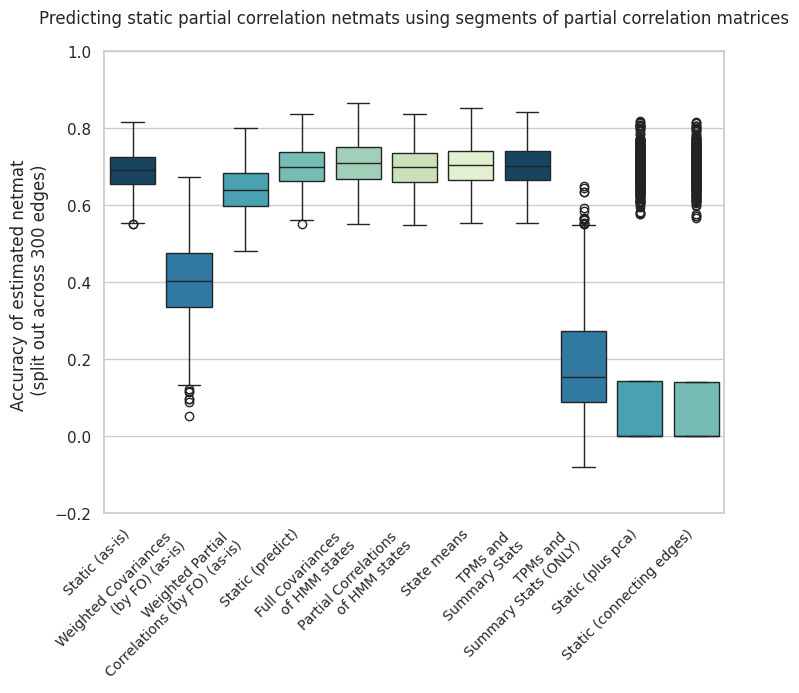

In [16]:
# ##################### Plot box plots of accuracies across HMM feature groups (across edges)  ########################

# transform array to list to make dataframe to pot as boxplots across edges
hmm_features_accuracy_list = []

for j in range(n_feat_type):
    hmm_features_accuracy_list.append(hmm_features_accuracy[j,:,:].flatten())

print(len(hmm_features_accuracy_list))
print(hmm_features_accuracy_list[0].shape)


# Create a dataframe with the data and group names
df = pd.DataFrame({'Group': np.repeat(labels, [hmm_features_accuracy_list[i].shape[0] for i in range(len(labels))]),
                   'Value': np.concatenate(hmm_features_accuracy_list)})

# Create the grouped boxplot using Seaborn
colors = ['#0B486B', '#1f7fb7', '#38adc3', '#6bc6bd', '#9ad6b8', '#c8e9b3', '#e1f5ca']
#colors = ['#0B486B', '#6bc6bd']
sns.set(style="whitegrid")
#sns.set(style="white")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors)

# Set the x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('Accuracy of estimated netmat \n (split out across 300 edges)')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

ymin = -0.2  # Minimum y-value
ymax = 1  # Maximum y-value
ax.set_ylim(ymin, ymax)


# Set the title
plt.title("Predicting static partial correlation netmats using segments of partial correlation matrices", fontsize=12, pad=20)

# Show the plot
plt.show()

/tmp/ipykernel_227839/2501490131.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=df_accuracy, palette=colors, ax=axes[0])
/tmp/ipykernel_227839/2501490131.py:29: UserWarning: 
The palette list has fewer values (7) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Group', y='Value', data=df_accuracy, palette=colors, ax=axes[0])
/tmp/ipykernel_227839/2501490131.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_227839/2501490131.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='V

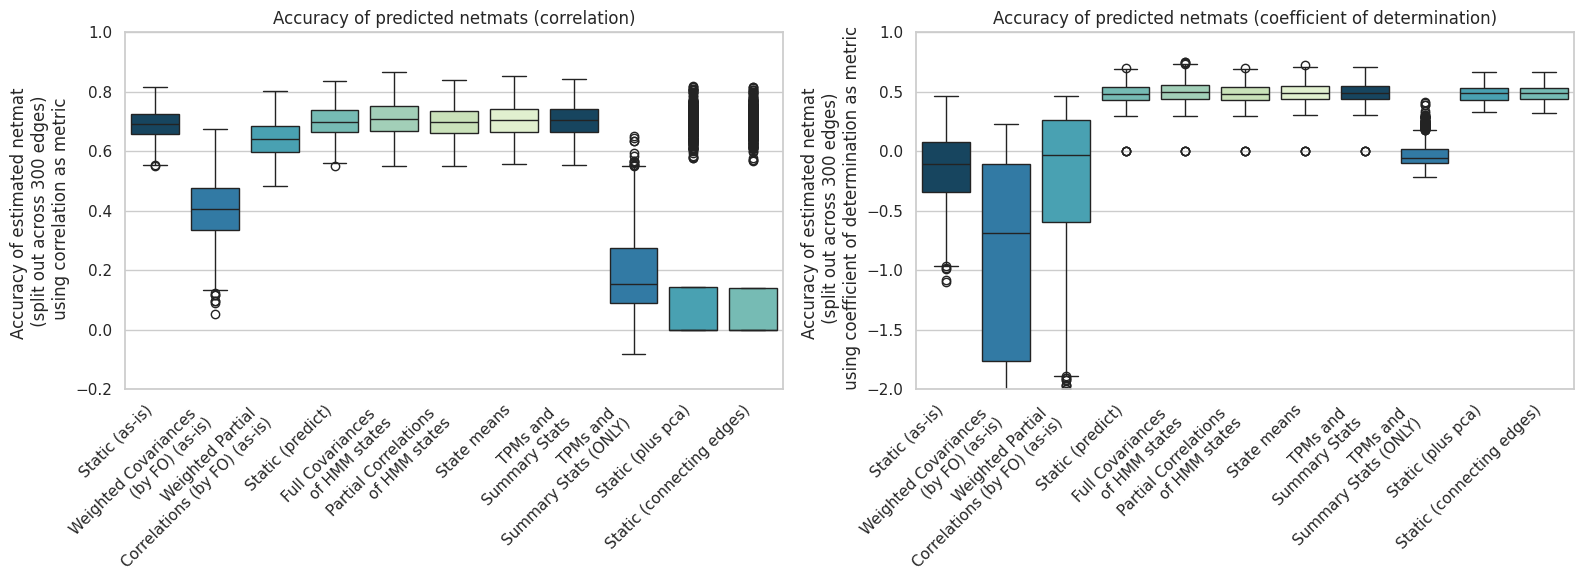

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the same 'labels' and number of feature types
n_feat_type = len(labels)  # Replace with the correct number if different

# Convert hmm_features_r2_accuracy to list format
hmm_features_r2_accuracy_list = []
for j in range(n_feat_type):
    hmm_features_r2_accuracy_list.append(hmm_features_r2_accuracy[j,:,:].flatten())

# Create a dataframe with the r2 data and group names
df_r2 = pd.DataFrame({
    'Group': np.repeat(labels, [hmm_features_r2_accuracy_list[i].shape[0] for i in range(len(labels))]),
    'Value': np.concatenate(hmm_features_r2_accuracy_list)
})

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for hmm_features_accuracy
df_accuracy = pd.DataFrame({
    'Group': np.repeat(labels, [hmm_features_accuracy_list[i].shape[0] for i in range(len(labels))]),
    'Value': np.concatenate(hmm_features_accuracy_list)
})

sns.boxplot(x='Group', y='Value', data=df_accuracy, palette=colors, ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Accuracy of estimated netmat \n (split out across 300 edges) \n using correlation as metric')
axes[0].set_ylim(ymin, ymax)
axes[0].set_title('Accuracy of predicted netmats (correlation)', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Boxplot for hmm_features_r2_accuracy
sns.boxplot(x='Group', y='Value', data=df_r2, palette=colors, ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Accuracy of estimated netmat \n (split out across 300 edges)\n using coefficient of determination as metric')
axes[1].set_ylim(ymin, ymax)
axes[1].set_ylim(-2, ymax)
axes[1].set_title('Accuracy of predicted netmats (coefficient of determination)', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
print(*feature_prediction_dict['fc'])

alpha l1_ratio corr_y predict_y beta accuracy_per_edge r2_accuracy_per_edge


In [ ]:
print(feature_prediction_dict['fc']['beta'].shape)
print(feature_prediction_dict['all']['beta'].shape)
# 2900 because you want the main diagonal so you keep (25 x 26)/2 (2600 for fc) + 300 (for static)
# 5596 because 2400 for PC (exlcuding main diagonal), 2600 for FC, ,  25*8 (200 for means), 300 for static, 8*8 (64 for TPMs), 4*8 (32 for SS)
# in this order:
# feat = np.concatenate([feat_icovs, feat_covs, feat_means, feat_tpm, feat_ss],axis=1)

beta_all_abs = np.mean(np.mean(np.abs(feature_prediction_dict['all']['beta']), axis=2), axis=1)
beta_all = np.mean(np.mean(feature_prediction_dict['all']['beta'], axis=2), axis=1)
beta_all.shape

(4, 10, 300, 2900)


KeyError: 'all'

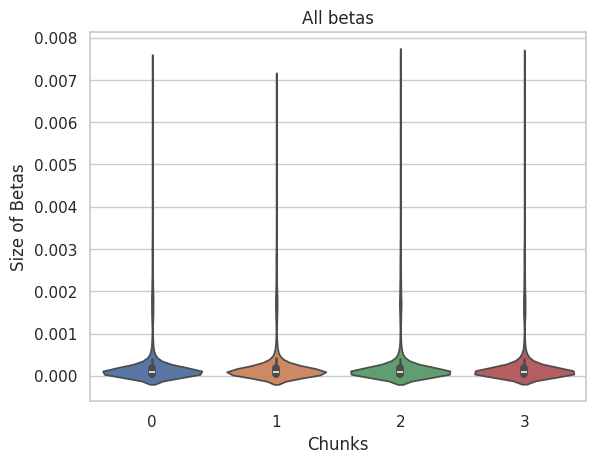

In [ ]:
# Create a new figure
fig = plt.figure()

# Set the title
plt.title("All betas")

# Create the violin plot with four violins
sns.violinplot(data=beta_all_abs.T)

# Set the x-axis label
plt.xlabel("Chunks")

# Set the y-axis label
plt.ylabel("Size of Betas")

# Show the figure
plt.show()

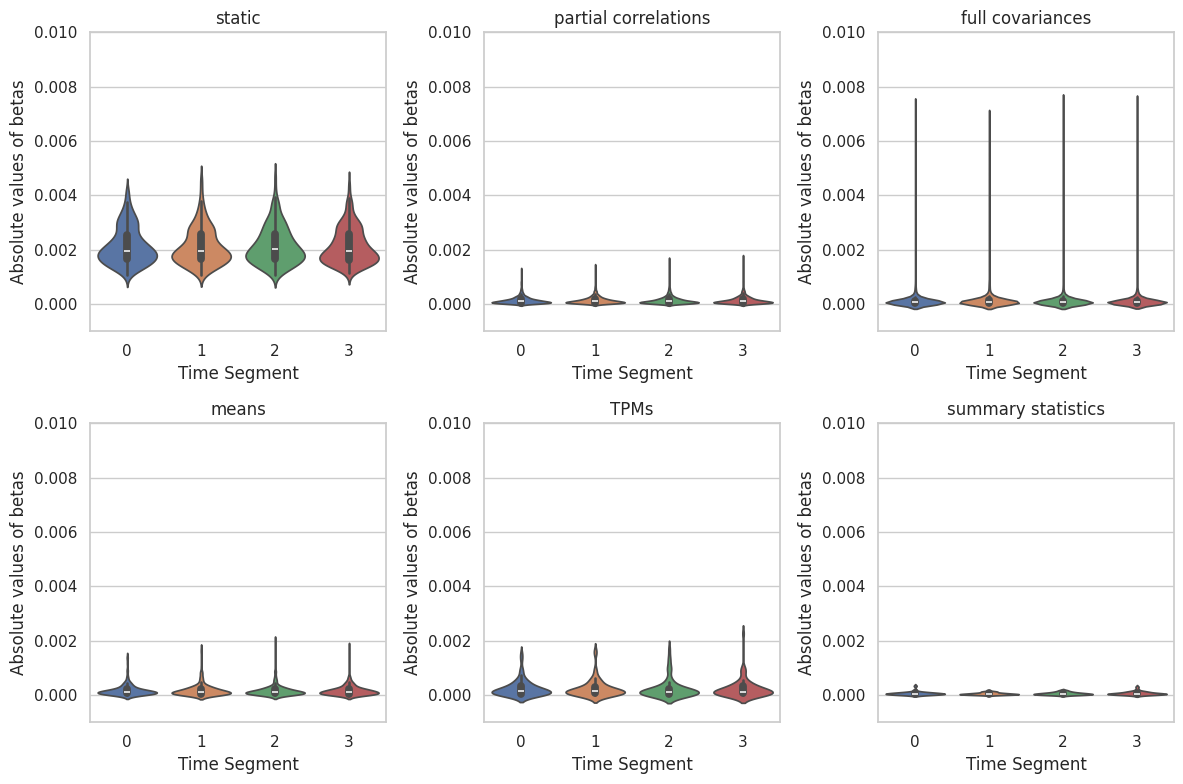

In [ ]:
# Define the indices for each type of element
indices = {
    "static": (0, 300),
    "partial correlations": (300, 2700),
    "full covariances": (2700, 5300),
    "means": (5300, 5500),
    "TPMs": (5500, 5564),
    "summary statistics": (5564, 5596)
}

# Extract sections
beta_sections = {key: beta_all_abs[:, start:end] for key, (start, end) in indices.items()}

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create violin plots for each section
for i, (key, data) in enumerate(beta_sections.items()):
    ax = axes[i]
    sns.violinplot(data=data.T, ax=ax)  # Transpose data to have 4 violins for each type
    ax.set_title(key)
    ax.set_xlabel("Time Segment")
    ax.set_ylabel("Absolute values of betas")
    ax.set_ylim(-0.001, 0.01) 

# Adjust layout to fit plots into the figure area
plt.tight_layout()

# Show the figure
plt.show()


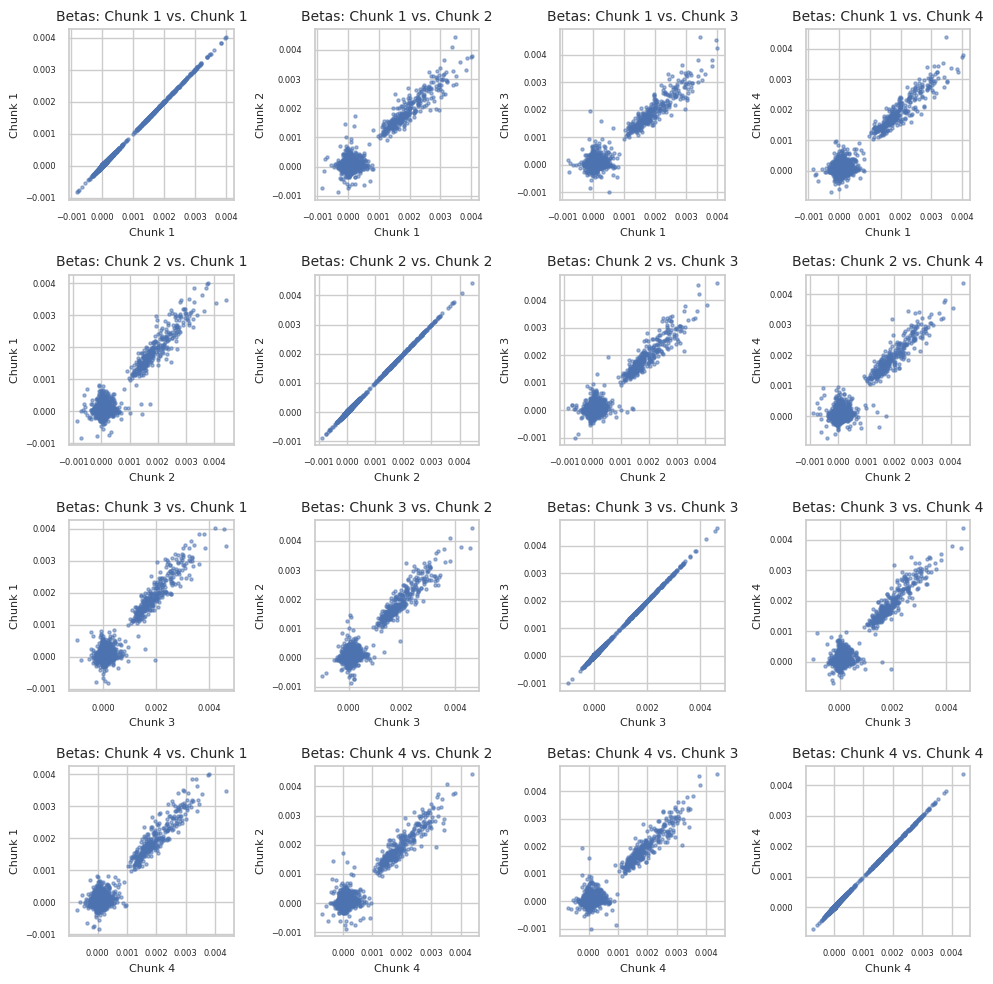

In [ ]:
# Create a figure with 16 subplots (4 rows, 4 columns)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Adjust figsize as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create scatter plots for each pair of chunks
for i in range(4):
    for j in range(4):
        ax = axes[i * 4 + j]
        ax.scatter(beta_all[i, :], beta_all[j, :], alpha=0.5, s=5)  # Set `s` to control point size
        ax.set_xlabel(f"Chunk {i+1}", fontsize=8)  # Set font size for x-axis labels
        ax.set_ylabel(f"Chunk {j+1}", fontsize=8)  # Set font size for y-axis labels
        ax.set_title(f"Betas: Chunk {i+1} vs. Chunk {j+1}", fontsize=10)  # Set font size for titles
        ax.tick_params(axis='both', which='major', labelsize=6)  # Set font size for tick labels

# Adjust layout to fit plots into the figure area
plt.tight_layout()

# Show the figure
plt.show()

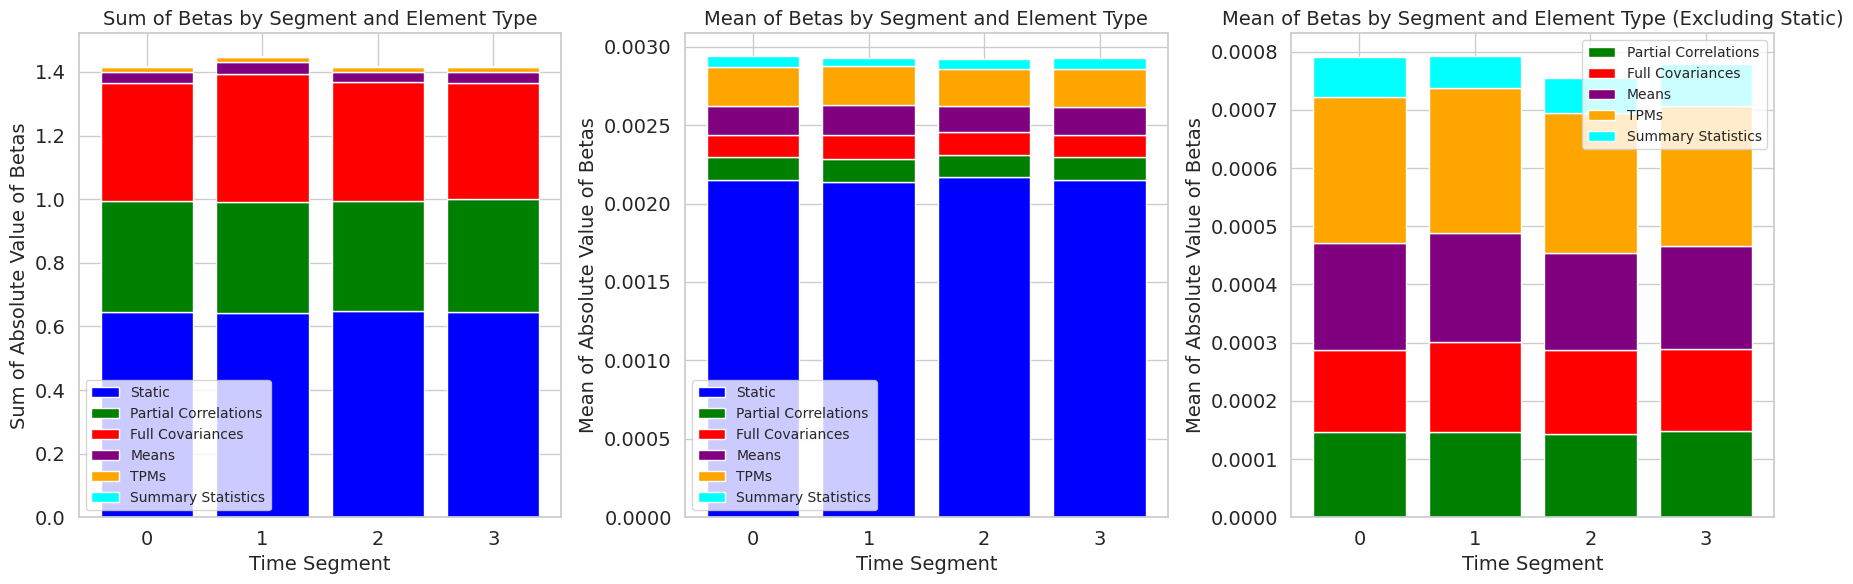

In [ ]:
# Define the element types and their ranges
element_types_including_static = {
    "Static": (0, 300),
    "Partial Correlations": (300, 2700),
    "Full Covariances": (2700, 5300),
    "Means": (5300, 5500),
    "TPMs": (5500, 5564),
    "Summary Statistics": (5564, 5596)
}

element_types_excluding_static = {
    "Partial Correlations": (300, 2700),
    "Full Covariances": (2700, 5300),
    "Means": (5300, 5500),
    "TPMs": (5500, 5564),
    "Summary Statistics": (5564, 5596)
}

# Calculate the sums and means for each element type and chunk
sums_by_element_type_including_static = {key: np.sum(beta_all_abs[:, start:end], axis=1) for key, (start, end) in element_types_including_static.items()}
means_by_element_type_including_static = {key: np.mean(beta_all_abs[:, start:end], axis=1) for key, (start, end) in element_types_including_static.items()}
means_by_element_type_excluding_static = {key: np.mean(beta_all_abs[:, start:end], axis=1) for key, (start, end) in element_types_excluding_static.items()}

# Set the figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors for each element type
colors = ["blue", "green", "red", "purple", "orange", "cyan"]

# Plot 1: Sum of Betas by Chunk and Element Type (Including Static)
ax = axes[0]
bottom = np.zeros(4)
for (element, color) in zip(element_types_including_static.keys(), colors):
    ax.bar(range(4), sums_by_element_type_including_static[element], bottom=bottom, label=element, color=color)
    bottom += sums_by_element_type_including_static[element]
    ax.set_xlabel("Time Segment", fontsize=14)
    ax.set_ylabel("Sum of Absolute Value of Betas", fontsize=14)
    ax.set_title("Sum of Betas by Segment and Element Type", fontsize=14)
    ax.legend(fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Plot 2: Mean of Betas by Chunk and Element Type (Including Static)
ax = axes[1]
bottom = np.zeros(4)
for (element, color) in zip(element_types_including_static.keys(), colors):
    ax.bar(range(4), means_by_element_type_including_static[element], bottom=bottom, label=element, color=color)
    bottom += means_by_element_type_including_static[element]
    ax.set_xlabel("Time Segment", fontsize=14)
    ax.set_ylabel("Mean of Absolute Value of Betas", fontsize=14)
    ax.set_title("Mean of Betas by Segment and Element Type", fontsize=14)
    ax.legend(fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Plot 3: Mean of Betas by Chunk and Element Type (Excluding Static)
ax = axes[2]
bottom = np.zeros(4)
for (element, color) in zip(element_types_excluding_static.keys(), colors[1:]):  # Exclude the first color for Static
    ax.bar(range(4), means_by_element_type_excluding_static[element], bottom=bottom, label=element, color=color)
    bottom += means_by_element_type_excluding_static[element]
    ax.set_xlabel("Time Segment", fontsize=14)
    ax.set_ylabel("Mean of Absolute Value of Betas", fontsize=14)
    ax.set_title("Mean of Betas by Segment and Element Type (Excluding Static)", fontsize=14)
    ax.legend(fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to fit plots into the figure area
plt.tight_layout()

# Show the figure
plt.show()


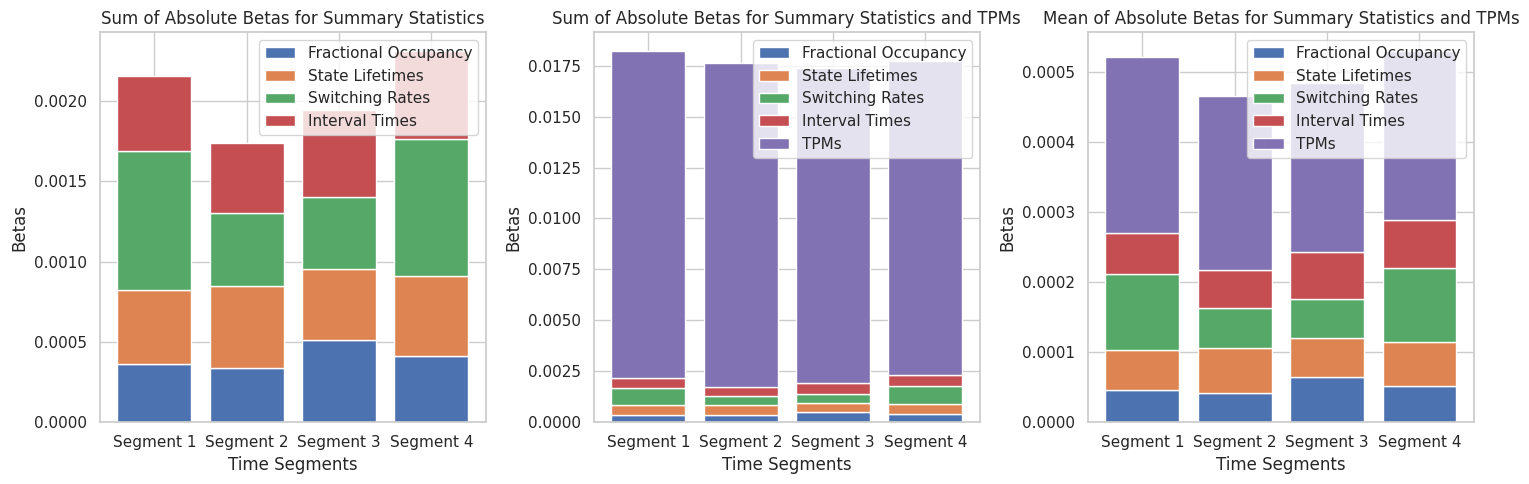

In [ ]:
# Define the ranges for each subset of "Summary Statistics" and TPMs
summary_stats_ranges = {
    "Fractional Occupancy": (5564, 5572),
    "State Lifetimes": (5572, 5580),
    "Switching Rates": (5580, 5588),
    "Interval Times": (5588, 5596),
    "TPMs": (5500, 5564)
}

# Calculate the sum of absolute values for each subset of "Summary Statistics" (excluding TPMs)
sum_abs_betas_by_summary_stats = {key: np.sum(np.abs(beta_all_abs[:, start:end]), axis=1) for key, (start, end) in summary_stats_ranges.items() if key != "TPMs"}

# Calculate the sum of absolute values for each subset of "Summary Statistics" (including TPMs)
sum_abs_betas_by_summary_stats_with_tpm = {key: np.sum(np.abs(beta_all_abs[:, start:end]), axis=1) for key, (start, end) in summary_stats_ranges.items()}

# Calculate the mean of absolute values for each subset of "Summary Statistics" (including TPMs)
mean_abs_betas_by_summary_stats_with_tpm = {key: np.mean(np.abs(beta_all_abs[:, start:end]), axis=1) for key, (start, end) in summary_stats_ranges.items()}

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the sum of absolute betas for "Summary Statistics" (excluding TPMs)
for i, (subset, data) in enumerate(sum_abs_betas_by_summary_stats.items()):
    axes[0].bar(np.arange(4), data, label=subset, bottom=np.sum(list(sum_abs_betas_by_summary_stats.values())[:i], axis=0) if i > 0 else None)

# Plot the sum of absolute betas for "Summary Statistics" (including TPMs)
for i, (subset, data) in enumerate(sum_abs_betas_by_summary_stats_with_tpm.items()):
    axes[1].bar(np.arange(4), data, label=subset, bottom=np.sum(list(sum_abs_betas_by_summary_stats_with_tpm.values())[:i], axis=0) if i > 0 else None)

# Plot the mean of absolute betas for "Summary Statistics" (including TPMs)
for i, (subset, data) in enumerate(mean_abs_betas_by_summary_stats_with_tpm.items()):
    axes[2].bar(np.arange(4), data, label=subset, bottom=np.sum(list(mean_abs_betas_by_summary_stats_with_tpm.values())[:i], axis=0) if i > 0 else None)

# Add labels and titles
titles = ["Sum of Absolute Betas for Summary Statistics",
          "Sum of Absolute Betas for Summary Statistics and TPMs",
          "Mean of Absolute Betas for Summary Statistics and TPMs"]
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_xlabel("Time Segments")
    ax.set_ylabel("Betas")
    ax.set_xticks(range(4))
    ax.set_xticklabels([f"Segment {i+1}" for i in range(4)])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
# static_dir = f"{proj_dir}/results/ICA_{n_ICs}/static"
# partial_correlations_chunk = np.load(f"{static_dir}/partial_correlations_{n_chunk}_chunks.npy")
# print(partial_correlations_chunk.shape)
# partial_correlations_chunk_flatten = PartialCorrClass.extract_upper_off_main_diag(partial_correlations_chunk)
# print(partial_correlations_chunk_flatten.shape)

In [ ]:
#print(*feature)
print(*feature_prediction_dict['weighted_covs'])
print(*feature_prediction_dict['weighted_icovs'])
print(*feature_prediction_dict['weighted_covs_actual'])
print(*feature_prediction_dict['weighted_icovs_actual'])

KeyError: 'weighted_covs'

In [ ]:
# set project directories
proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/nets-predict/nets_predict'
n_chunk = 4
n_ICs = 25

load_dir = f"{proj_dir}/results/ICA_{n_ICs}/edge_prediction/{n_chunk}_chunks/combined"

# decide which featured to examine
feature_prediction_dict = dict()
# feature_prediction_dict['actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual.npz")
# feature_prediction_dict['static'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True.npz")

feature_prediction_dict['actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual_with_r2.npz")
feature_prediction_dict['static'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True_with_r2.npz")

# feature_prediction_dict['fc'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_fc_states_{n_states}_model_mean_True.npz")
# feature_prediction_dict['pc'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_pc_states_{n_states}_model_mean_True.npz")
# #feature_prediction_dict['all'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_all_states_{n_states}_model_mean_True.npz")
# feature_prediction_dict['means'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_means_states_{n_states}_model_mean_True.npz")
# feature_prediction_dict['tpms_ss'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_states_{n_states}_model_mean_True.npz")
# feature_prediction_dict['tpms_ss_only'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_only_states_{n_states}_model_mean_True.npz")
# #feature_prediction_dict['weighted_covs'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_covs_states_{n_states}_model_mean_True.npz")
# #feature_prediction_dict['weighted_icovs'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_icovs_states_{n_states}_model_mean_True.npz")
# feature_prediction_dict['weighted_covs_actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_covs_states_{n_states}_model_mean_True_actual.npz")
# feature_prediction_dict['weighted_icovs_actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_icovs_states_{n_states}_model_mean_True_actual.npz")


n_feat_type = len(feature_prediction_dict)

In [ ]:
partial_correlations_chunk_flatten.shape

(1003, 4, 300)

In [ ]:
# let's combine the prediction accuracies for each hmm features into a combined array
hmm_features_accuracy = np.zeros((n_feat_type, n_chunk, n_edge))
hmm_features_r2_accuracy = np.zeros((n_feat_type, n_chunk, n_edge))
feat_num = 0
for key, feature in feature_prediction_dict.items():
    print(feature)
    hmm_features_accuracy[feat_num,:,:] = feature['accuracy_per_edge']
    #hmm_features_r2_accuracy[feat_num,:,:] = feature['r2_accuracy_per_edge']


    for chunk in range(n_chunk):
        print(chunk)
        for edge in range(1,n_edge):
            if key == 'weighted_covs_actual' or key == 'weighted_icovs_actual' or key == 'actual':
                hmm_features_r2_accuracy[feat_num, chunk, edge] = r2_score(ground_truth_matrix_partial_flatten[:, edge], feature['netmats_flatten'][chunk, :, edge])
            else:
                hmm_features_r2_accuracy[feat_num, chunk, edge] = r2_score(ground_truth_matrix_partial_flatten[:, edge], feature['predict_y'][chunk, :, edge])
    
    feat_num += 1



print(np.mean(hmm_features_r2_accuracy[0,:,:]))
print(np.mean(hmm_features_r2_accuracy[1,:,:]))

0
1
2
3
0
1
2
3
-0.13159892007882856
0.48750623674656784


In [ ]:
print(np.mean(hmm_features_r2_accuracy[0,:,:]))
print(np.mean(hmm_features_r2_accuracy[1,:,:]))

-0.13159892007882856
0.48750623674656784


In [ ]:
r2_per_edge_nm_icov_pm_icov_version2 = np.zeros((n_chunk, n_edge))
r2_per_edge_nm_icov_pm_icov_version2_pred = np.zeros((n_chunk, n_edge))

ground_truth_matrix_partial_flatten = feature_prediction_dict['actual']['ground_truth_matrix_partial_flatten']
netmats_flatten = feature_prediction_dict['actual']['netmats_flatten']

for edge in range(n_edge):
    print(edge)
    for chunk in range(n_chunk):
        r2_per_edge_nm_icov_pm_icov_version2[chunk,edge] = r2_score(ground_truth_matrix_partial_flatten[:,edge], feature_prediction_dict['actual']['netmats_flatten'][chunk,:,edge])
        r2_per_edge_nm_icov_pm_icov_version2_pred[chunk,edge] = r2_score(ground_truth_matrix_partial_flatten[:,edge], feature_prediction_dict['static']['predict_y'][chunk,:,edge])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print(np.mean(r2_per_edge_nm_icov_pm_icov_version2))
print(np.mean(r2_per_edge_nm_icov_pm_icov_version2_pred))

-0.13298486771787546
0.4888788082418919


In [ ]:


# # Paths for each feature
# file_paths = {
#     'actual': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual.npz",
#     'static': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True.npz",
#     'fc': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_fc_states_{n_states}_model_mean_True.npz",
#     'pc': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_pc_states_{n_states}_model_mean_True.npz",
#     #'all': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_all_states_{n_states}_model_mean_True.npz",
#     'means': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_means_states_{n_states}_model_mean_True.npz",
#     'tpms_ss': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_states_{n_states}_model_mean_True.npz",
#     'tpms_ss_only': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_only_states_{n_states}_model_mean_True.npz",
#     # 'weighted_covs': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_covs_states_{n_states}_model_mean_True.npz",
#     # 'iweighted_covs': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_icovs_states_{n_states}_model_mean_True.npz",
#     'weighted_covs_actual': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_covs_states_{n_states}_model_mean_True_actual.npz",
#     'weighted_icovs_actual': f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_weighted_icovs_states_{n_states}_model_mean_True_actual.npz"
# }


# # hmm_features_r2_accuracy = np.random.rand(len(file_paths), 300, 300)  # Replace with your actual r2_accuracy_per_edge data

# for idx, feature_name in enumerate(file_paths.keys()):
#     file_path = file_paths[feature_name]
#     save_path = file_path.replace(".npz", "_with_r2.npz")
    
#     # Load the existing npz file
#     data = np.load(file_path)
    
#     # Extract the existing variables
#     variables = {key: data[key] for key in data.files}
    
#     # Add the new 'r2_accuracy_per_edge' variable
#     variables['r2_accuracy_per_edge'] = hmm_features_r2_accuracy[idx]
    
#     # Save the updated variables back into a new npz file
#     np.savez(save_path, **variables)

#     print(f"Updated file saved for feature: {feature_name}")

# # feature_prediction_dict_2 = dict()
# # feature_prediction_dict_2['actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual_with_r2.npz")
# # feature_prediction_dict_2['static'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True_with_r2.npz")

# # print(*feature_prediction_dict_2['actual'])
# # print(*feature_prediction_dict_2['static'])



Updated file saved for feature: actual
Updated file saved for feature: static
Updated file saved for feature: fc
Updated file saved for feature: pc
Updated file saved for feature: means
Updated file saved for feature: tpms_ss
Updated file saved for feature: tpms_ss_only
Updated file saved for feature: weighted_covs_actual
Updated file saved for feature: weighted_icovs_actual
